## Data 1030 Final Project_HBV

## Name: Wenqing Yuan

## Link to the github repo: https://github.com/wenqingyc/data1030_prjct_HBV.git

### Dataset: Liver Cancer Predictions from Kaggle

### Link to dataset: https://www.kaggle.com/datasets/ankushpanday1/liver-cancer-predictions?resource=download

Rrrrrr

In [2]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.10"):
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "2.2.5", 'matplotlib': "3.10.1",'sklearn': "1.6.1", 
                'pandas': "2.2.3",'xgboost': "3.0.0", 'shap': "0.47.2", 
                'polars': "1.27.1", 'seaborn': "0.13.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.10

[ OK ] numpy version 2.2.5 is installed.
[ OK ] matplotlib version 3.10.1 is installed.
[ OK ] sklearn version 1.6.1 is installed.
[ OK ] pandas version 2.2.3 is installed.
[ OK ] xgboost version 3.0.0 is installed.
[ OK ] shap version 0.47.2 is installed.
[ OK ] polars version 1.27.1 is installed.
[ OK ] seaborn version 0.13.2 is installed.


In [78]:
# import all necessary packages
import pandas as pd
import openpyxl
import os
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split


**0. Data Collection/Manipulation**:

In [88]:
df = pd.read_excel('data/HBV_liver_pred.xlsx')
cols_to_drop = ['Population','Incidence_Rate','Mortality_Rate']
df.drop(columns=cols_to_drop, inplace=True) 
# print(df.head())
X = df.loc[:, df.columns != 'Prediction']
# print(X.head())
y = df['Prediction']
# print(y.head())

print(df.shape)
print(f"This liver_pred dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"Does this dataset has missing value? {df.isnull().values.any()}")

# Datatypes of the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
col_type = df.dtypes.reset_index()
col_type.columns = ['Column', 'DataType']
print(col_type)

(160292, 22)
This liver_pred dataframe has 160292 rows and 22 columns.
Does this dataset has missing value? False
                     Column DataType
0                   Country   object
1                    Region   object
2                    Gender   object
3                       Age    int64
4       Alcohol_Consumption   object
5            Smoking_Status   object
6        Hepatitis_B_Status   object
7        Hepatitis_C_Status   object
8                   Obesity   object
9                  Diabetes   object
10           Rural_or_Urban   object
11      Seafood_Consumption   object
12      Herbal_Medicine_Use   object
13        Healthcare_Access   object
14   Screening_Availability   object
15   Treatment_Availability   object
16  Liver_Transplant_Access   object
17                Ethnicity   object
18          Preventive_Care   object
19            Survival_Rate  float64
20        Cost_of_Treatment  float64
21               Prediction   object


In [89]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,160292,30,Italy,5473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,160292,10,Sub-Saharan Africa,32158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,160292,2,Male,112391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,160292.0,NaN,NaN,NaN,54.640088,20.188217,20.0,37.0,55.0,72.0,89.0
Alcohol_Consumption,160292,3,Moderate,53708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smoking_Status,160292,2,Non-Smoker,80237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hepatitis_B_Status,160292,2,Negative,136245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hepatitis_C_Status,160292,2,Negative,144336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obesity,160292,4,Underweight,40467,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diabetes,160292,2,No,128412,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df.head()

,Country,Region,Population,Incidence_Rate,Mortality_Rate,Gender,Age,Alcohol_Consumption,Smoking_Status,Hepatitis_B_Status,Hepatitis_C_Status,Obesity,Diabetes,Rural_or_Urban,Seafood_Consumption,Herbal_Medicine_Use,Healthcare_Access,Screening_Availability,Treatment_Availability,Liver_Transplant_Access,Ethnicity,Preventive_Care,Survival_Rate,Cost_of_Treatment,Prediction
0,Nigeria,Sub-Saharan Africa,340672131,15.381360,6.160480,Male,81,Low,Smoker,Negative,Negative,Normal,No,Rural,Medium,No,Poor,Available,Available,No,Hispanic,Good,17.724793,47486.167423,Yes
1,United Kingdom,Europe,1054632817,3.306101,14.392985,Male,87,Low,Smoker,Negative,Negative,Underweight,Yes,Rural,High,Yes,Good,Available,Not Available,No,Mixed,Moderate,19.558853,13782.265151,No
2,India,South Asia,751241440,9.325053,12.777878,Male,34,Moderate,Smoker,Negative,Negative,Underweight,No,Rural,Medium,No,Good,Not Available,Not Available,No,Mixed,Moderate,68.468892,25308.034132,No
3,Colombia,South America,1167333367,9.399658,8.634609,Male,63,Low,Non-Smoker,Positive,Negative,Underweight,Yes,Rural,Medium,No,Good,Not Available,Not Available,Yes,Hispanic,Moderate,18.200287,38221.622202,No
4,Iran,Middle East,1082070787,9.665663,12.422518,Male,85,High,Non-Smoker,Positive,Negative,Obese,No,Urban,Medium,Yes,Moderate,Available,Available,Yes,Mixed,Moderate,45.019153,26765.301404,No


<function matplotlib.pyplot.colorbar(mappable: 'ScalarMappable | ColorizingArtist | None' = None, cax: 'matplotlib.axes.Axes | None' = None, ax: 'matplotlib.axes.Axes | Iterable[matplotlib.axes.Axes] | None' = None, **kwargs) -> 'Colorbar'>

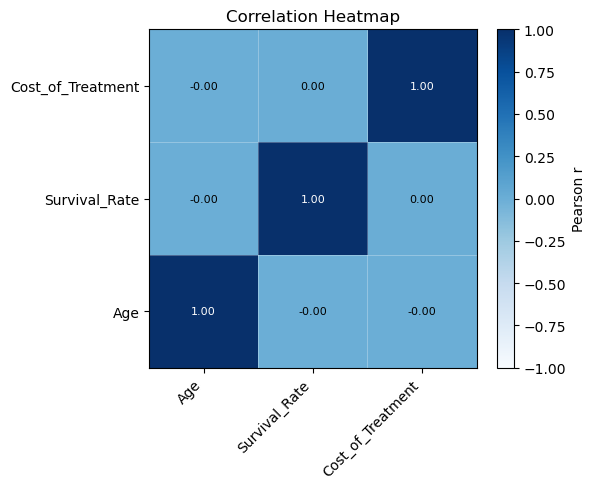

In [126]:
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()

plt.figure(figsize=(6, 5))
im = plt.imshow(corr, vmin=-1, vmax=1, cmap='Blues', origin='lower', aspect='auto')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar(im, label='Pearson r')
plt.title('Correlation Heatmap')
plt.tight_layout()
nrows, ncols = corr.shape
for i in range(nrows):
    for j in range(ncols):
        r = corr.iloc[i, j]
        if pd.isna(r):
            continue
        txt_color = 'white' if abs(r) > 0.5 else 'black'  # simple contrast rule
        plt.text(j, i, f"{r:.2f}", ha='center', va='center', color=txt_color, fontsize=8)

ax = plt.gca()
ax.set_xticks(np.arange(-0.5, ncols, 1), minor=True)
ax.set_yticks(np.arange(-0.5, nrows, 1), minor=True)
ax.grid(which='minor', color='w', linewidth=0.5, alpha=0.4)
ax.tick_params(which='minor', bottom=False, left=False)

plt.savefig("figure/corr_Pearson.png", transparent=True, dpi=300, bbox_inches="tight")
plt.colorbar

**1. Exploratory Data Analysis (EDA)**: the target variable (prediction of liver cancer) is a categorical feature.

Prediction
No     120270
Yes     40022
Name: count, dtype: int64
No missing value in the dataframe.


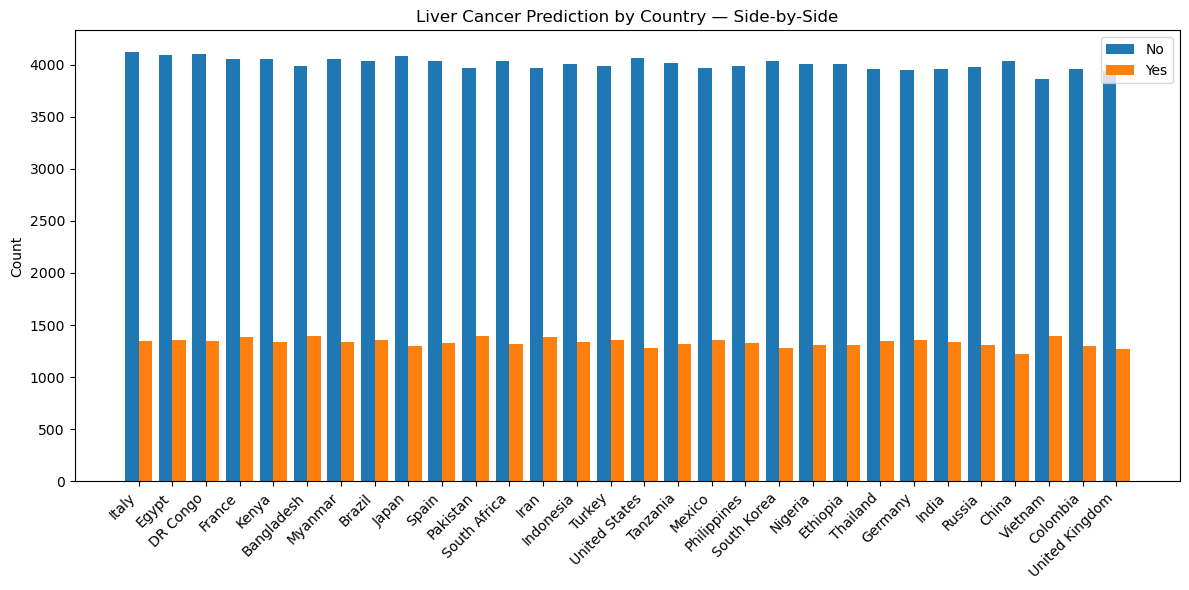

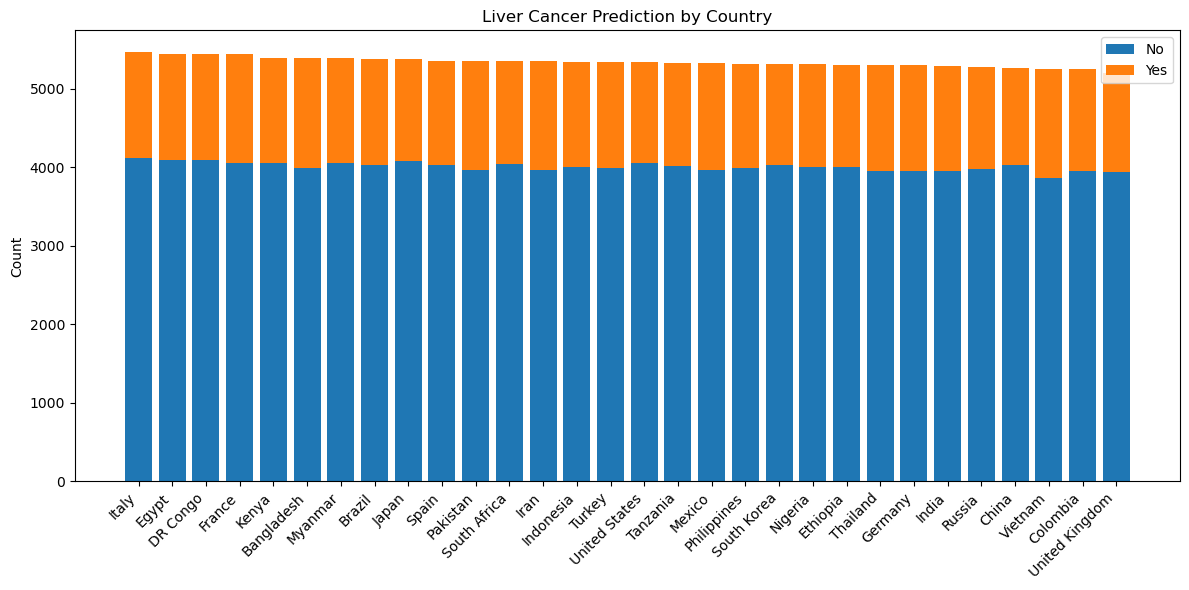

In [93]:
print(df['Prediction'].value_counts())

miss_ftr = []
for ftr in list(df.columns):
    if df[ftr].isna().sum():
        miss_pct = df[ftr].isna().sum() / df.shape[0] * 100
        miss_ftr.append(ftr)
        print(f"The column {ftr} has {miss_pct} % missing value.")
if not miss_ftr:
    print('No missing value in the dataframe.')

counts = (df.groupby(['Country', 'Prediction']).size().unstack('Prediction', fill_value=0))

for col in ['No', 'Yes']:
    if col not in counts.columns:
        counts[col] = 0
counts = counts[['No','Yes']]
counts = counts.assign(totalct=counts['No']+counts['Yes']).sort_values('totalct', ascending=False).drop(columns='totalct')

countries = counts.index.tolist()
x_ctr = list(range(len(countries)))
bar_width = 0.4
x_No, x_Yes = [], []
for i in x_ctr:
    x_No.append(i - bar_width/2)
    x_Yes.append(i + bar_width/2)

plt.figure(figsize=(12, 6))
plt.bar(x_No, counts['No'].values, width=bar_width, label='No')
plt.bar(x_Yes, counts['Yes'].values, width=bar_width, label='Yes')
plt.xticks(x_ctr, countries, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Liver Cancer Prediction by Country — Side-by-Side')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(x_ctr, counts['No'].values, label='No')
plt.bar(x_ctr, counts['Yes'].values, bottom=counts['No'].values, label='Yes')
plt.xticks(x_ctr, countries, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Liver Cancer Prediction by Country')
plt.legend()
plt.tight_layout()
plt.savefig("figure/Country_Pred.png", dpi=300, bbox_inches="tight")
plt.show()

Gender
Male      112391
Female     47901
Name: count, dtype: int64


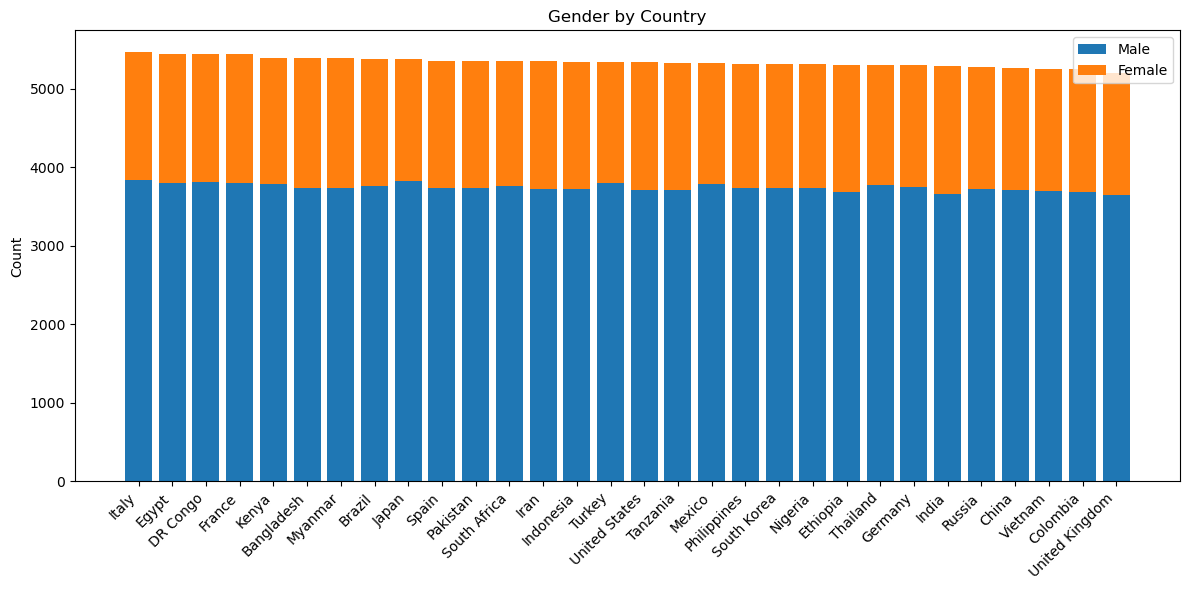

count    160292.000000
mean         54.640088
std          20.188217
min          20.000000
25%          37.000000
50%          55.000000
75%          72.000000
max          89.000000
Name: Age, dtype: float64


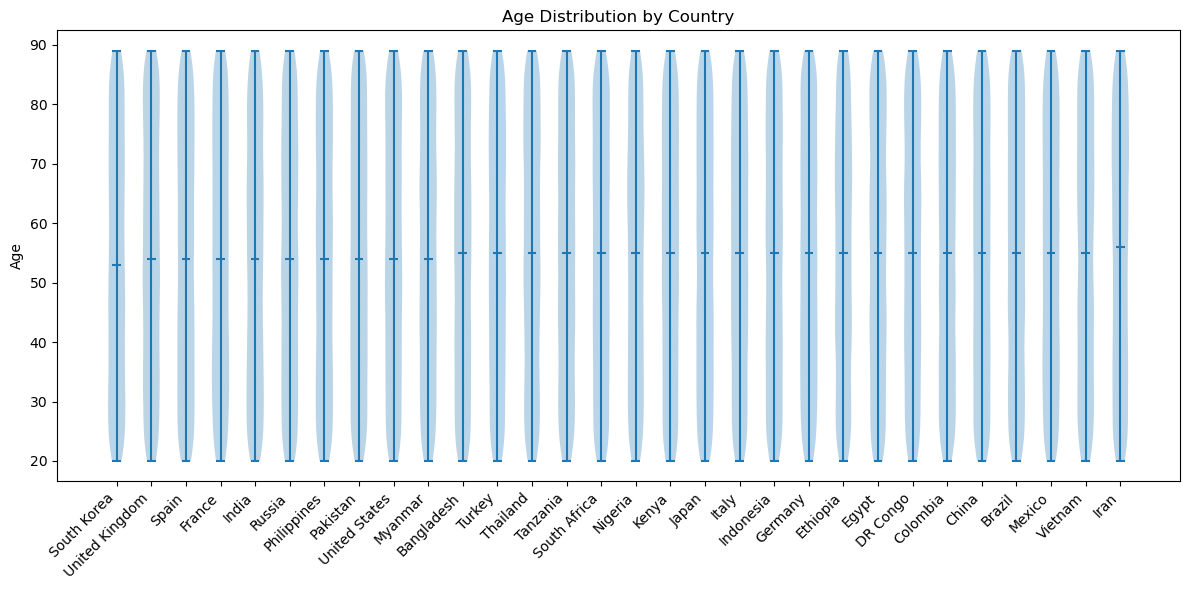

Alcohol_Consumption
Moderate    53708
High        53437
Low         53147
Name: count, dtype: int64


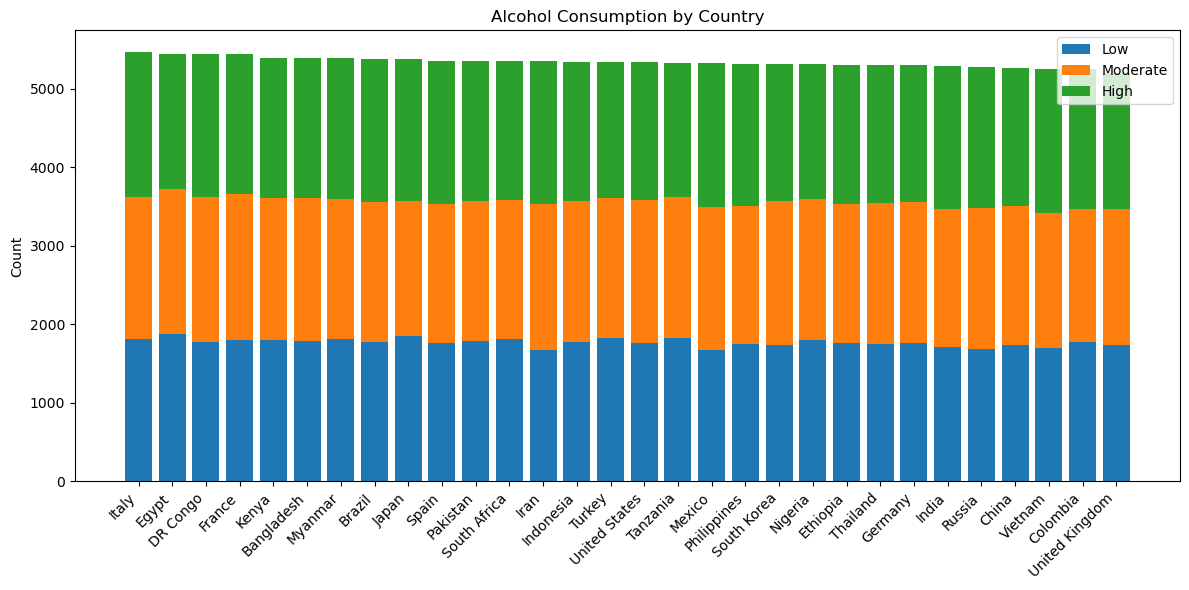

Smoking_Status
Non-Smoker    80237
Smoker        80055
Name: count, dtype: int64


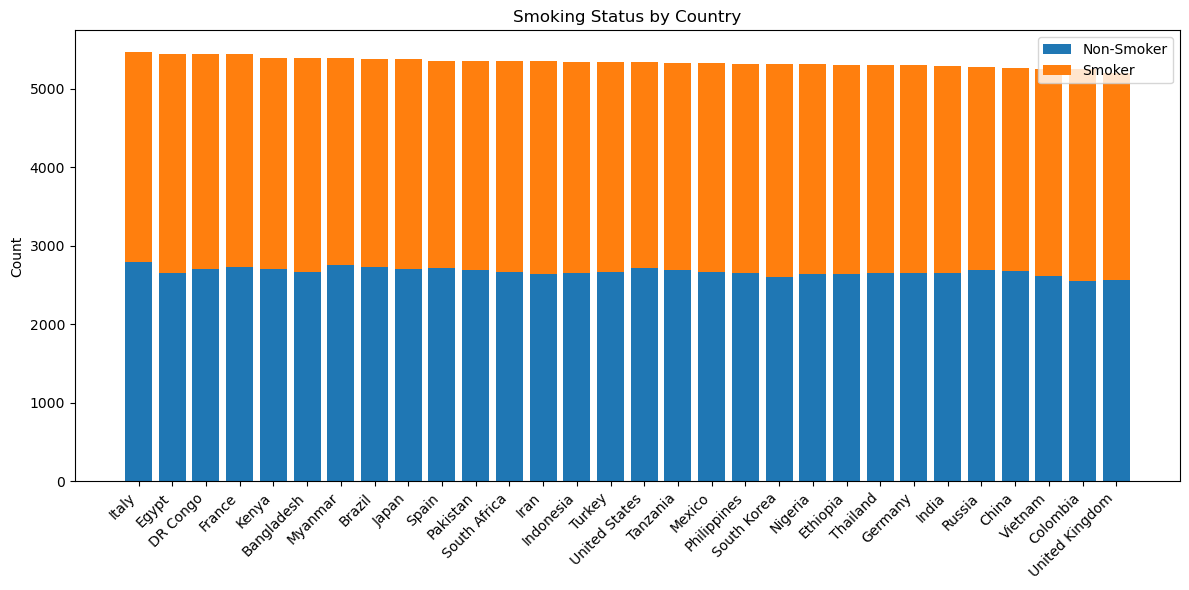

Hepatitis_B_Status
Negative    136245
Positive     24047
Name: count, dtype: int64


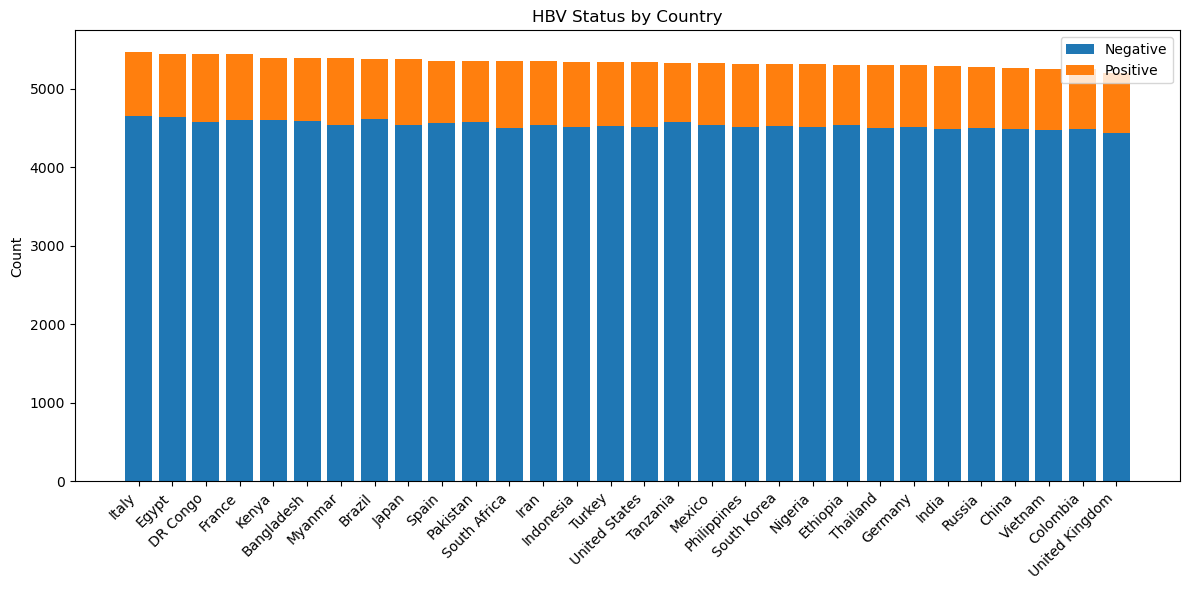

Hepatitis_C_Status
Negative    144336
Positive     15956
Name: count, dtype: int64


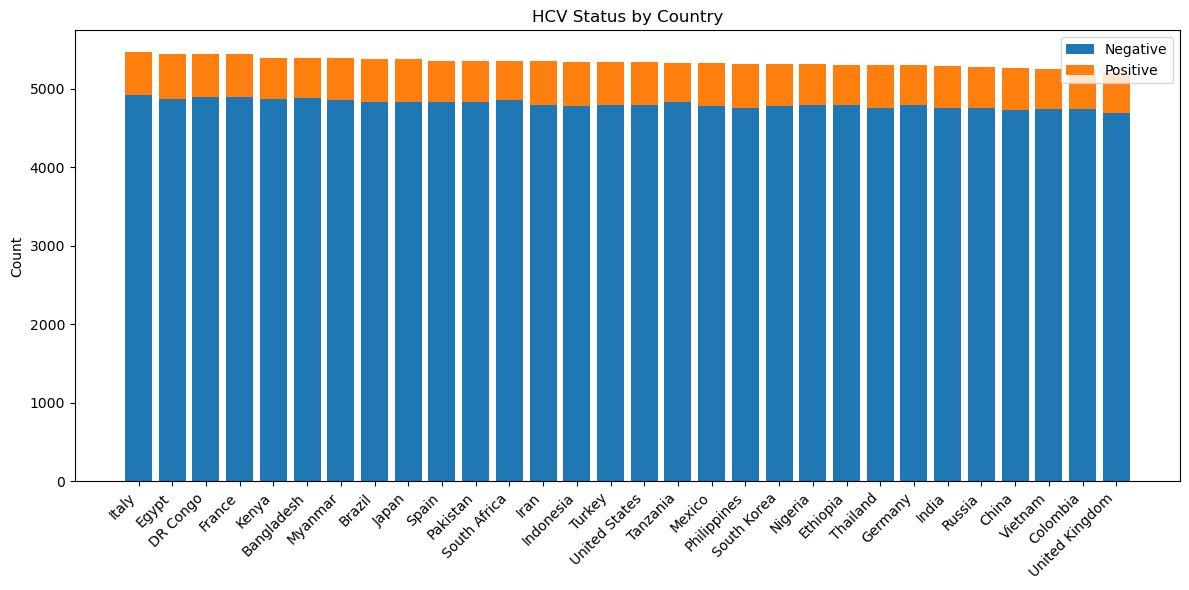

Obesity
Underweight    40467
Obese          40209
Normal         39904
Overweight     39712
Name: count, dtype: int64


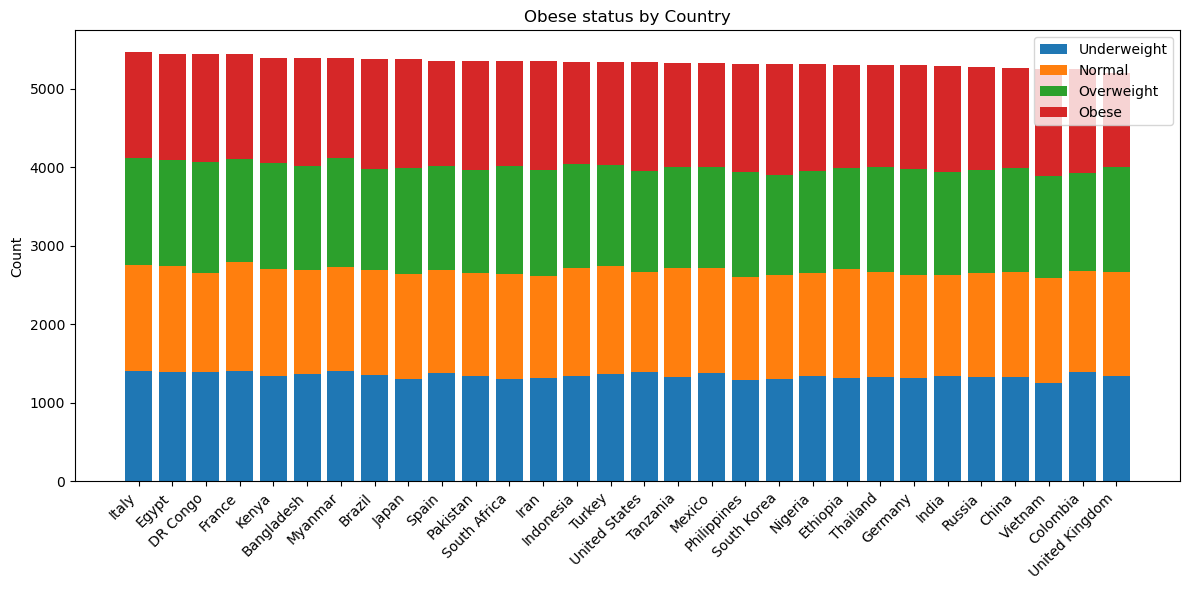

Diabetes
No     128412
Yes     31880
Name: count, dtype: int64


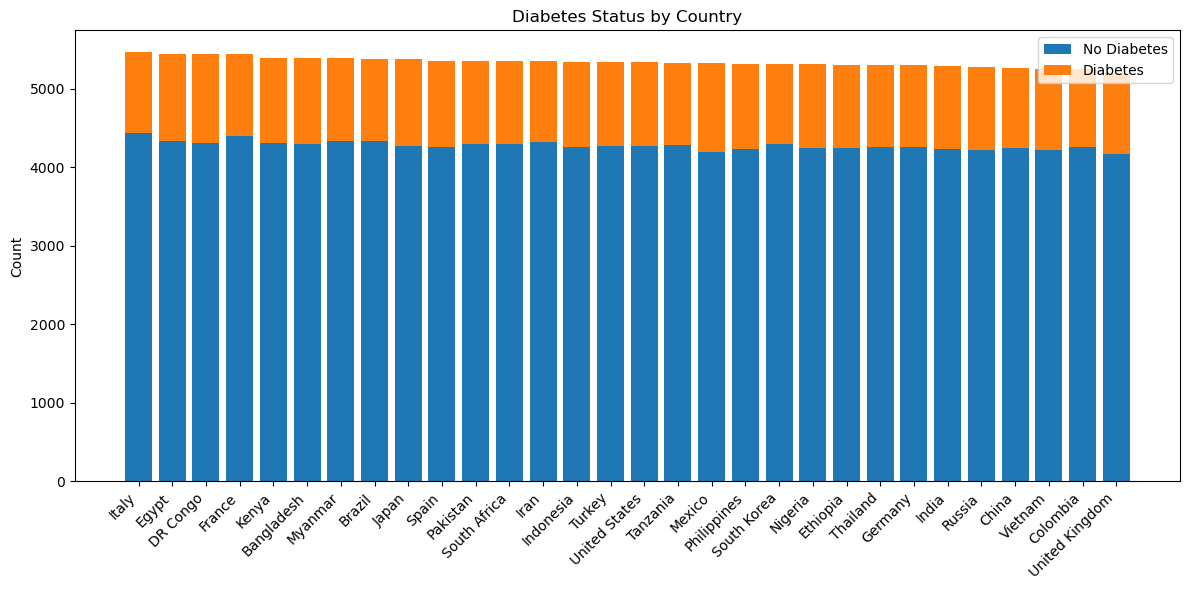

In [50]:
# Visualize features
# 1. Gender
print(df['Gender'].value_counts())
gender_ct = (df.groupby(['Country', 'Gender']).size().unstack('Gender', fill_value=0))
gender_ct = gender_ct[['Male','Female']]
gender_ct = gender_ct.assign(gct=gender_ct['Male']+gender_ct['Female']).sort_values('gct', ascending=False).drop(columns='gct')
g_countries = gender_ct.index.tolist()

plt.figure(figsize=(12, 6))
plt.bar(x_ctr, gender_ct['Male'].values, label='Male')
plt.bar(x_ctr, gender_ct['Female'].values, bottom=gender_ct['Male'].values, label='Female')
plt.xticks(x_ctr, g_countries, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Gender by Country')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Age
print(df['Age'].describe())
age_medians = (df.groupby('Country')['Age'].median().sort_values(ascending=True))
age_order = age_medians.index.tolist()
age_dt = []
for c in age_order:
    age_dt.append(df.loc[df['Country'] == c, 'Age'].values)

plt.figure(figsize=(12, 6))
plt.violinplot(dataset=age_dt, showmeans=False, showmedians=True, showextrema=True)
plt.xticks(ticks=range(1, len(age_order) + 1), labels=age_order, rotation=45, ha='right')
plt.ylabel('Age')
plt.title('Age Distribution by Country')
plt.tight_layout()
plt.show()

# 3. Alcohol consumption
print(df['Alcohol_Consumption'].value_counts())
alc_ct = (df.groupby(['Country', 'Alcohol_Consumption']).size().unstack('Alcohol_Consumption', fill_value=0))
alc_ct = alc_ct[['Low','Moderate','High']]
alc_ct = alc_ct.assign(alc=alc_ct['Low']+alc_ct['Moderate']+alc_ct['High']).sort_values('alc', ascending=False).drop(columns='alc')
alc_countries = alc_ct.index.tolist()

plt.figure(figsize=(12, 6))
plt.bar(x_ctr, alc_ct['Low'].values, label='Low')
plt.bar(x_ctr, alc_ct['Moderate'].values, bottom=alc_ct['Low'].values, label='Moderate')
plt.bar(x_ctr, alc_ct['High'].values, bottom=alc_ct['Low']+alc_ct['Moderate'].values, label='High')
plt.xticks(x_ctr, alc_countries, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Alcohol Consumption by Country')
plt.legend()
plt.tight_layout()
plt.show()

# 6. Hepatitis C status
print(df['Hepatitis_C_Status'].value_counts())
hcv_ct = (df.groupby(['Country', 'Hepatitis_C_Status']).size().unstack('Hepatitis_C_Status', fill_value=0))
hcv_ct = hcv_ct[['Negative','Positive']]
hcv_ct = hcv_ct.assign(hcv=hcv_ct['Negative']+hcv_ct['Positive']).sort_values('hcv', ascending=False).drop(columns='hcv')
hcv_countries = hcv_ct.index.tolist()

plt.figure(figsize=(12, 6))
plt.bar(x_ctr, hcv_ct['Negative'].values, label='Negative')
plt.bar(x_ctr, hcv_ct['Positive'].values, bottom=hcv_ct['Negative'].values, label='Positive')
plt.xticks(x_ctr, hcv_countries, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('HCV Status by Country')
plt.legend()
plt.tight_layout()
plt.show()

# 7. Obesity
print(df['Obesity'].value_counts())
ob_ct = (df.groupby(['Country', 'Obesity']).size().unstack('Obesity', fill_value=0))
ob_ct = ob_ct[['Underweight','Normal','Overweight','Obese']]
ob_ct = ob_ct.assign(ob=ob_ct['Underweight']+ob_ct['Normal']+ob_ct['Overweight']+ob_ct['Obese']).sort_values('ob', ascending=False).drop(columns='ob')
ob_countries = ob_ct.index.tolist()

plt.figure(figsize=(12, 6))
plt.bar(x_ctr, ob_ct['Underweight'].values, label='Underweight')
plt.bar(x_ctr, ob_ct['Normal'].values, bottom=ob_ct['Underweight'].values, label='Normal')
plt.bar(x_ctr, ob_ct['Overweight'].values, bottom=ob_ct['Underweight'].values+ob_ct['Normal'].values, label='Overweight')
plt.bar(x_ctr, ob_ct['Obese'].values, bottom=ob_ct['Underweight'].values+ob_ct['Normal'].values+ob_ct['Overweight'].values, label='Obese')
plt.xticks(x_ctr, ob_countries, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Obese status by Country')
plt.legend()
plt.tight_layout()
plt.show()



Smoking_Status
Non-Smoker    80237
Smoker        80055
Name: count, dtype: int64


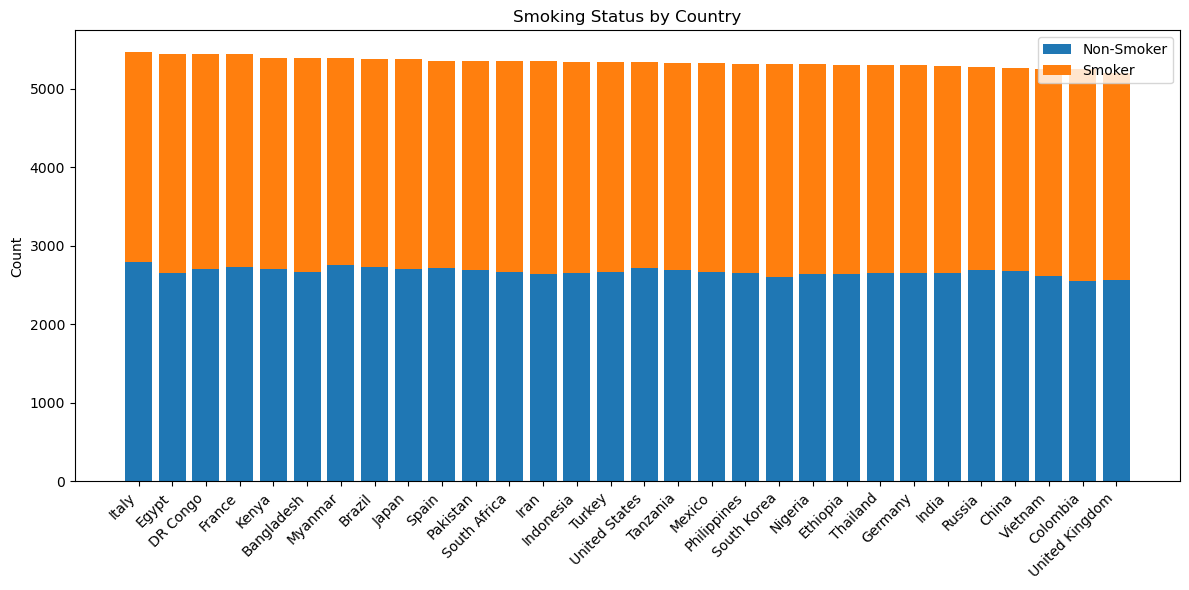

In [65]:
# 4. Smoking status
print(df['Smoking_Status'].value_counts())
smk_ct = (df.groupby(['Country', 'Smoking_Status']).size().unstack('Smoking_Status', fill_value=0))
smk_ct = smk_ct[['Non-Smoker','Smoker']]
smk_ct = smk_ct.assign(smk=smk_ct['Non-Smoker']+smk_ct['Smoker']).sort_values('smk', ascending=False).drop(columns='smk')
smk_countries = smk_ct.index.tolist()

plt.figure(figsize=(12, 6))
plt.bar(x_ctr, smk_ct['Non-Smoker'].values, label='Non-Smoker')
plt.bar(x_ctr, smk_ct['Smoker'].values, bottom=smk_ct['Non-Smoker'].values, label='Smoker')
plt.xticks(x_ctr, smk_countries, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Smoking Status by Country')
plt.legend()
plt.tight_layout()
plt.savefig("figure/smkByCountry.png", dpi=300, bbox_inches="tight")
plt.show()

Hepatitis_B_Status
Negative    136245
Positive     24047
Name: count, dtype: int64


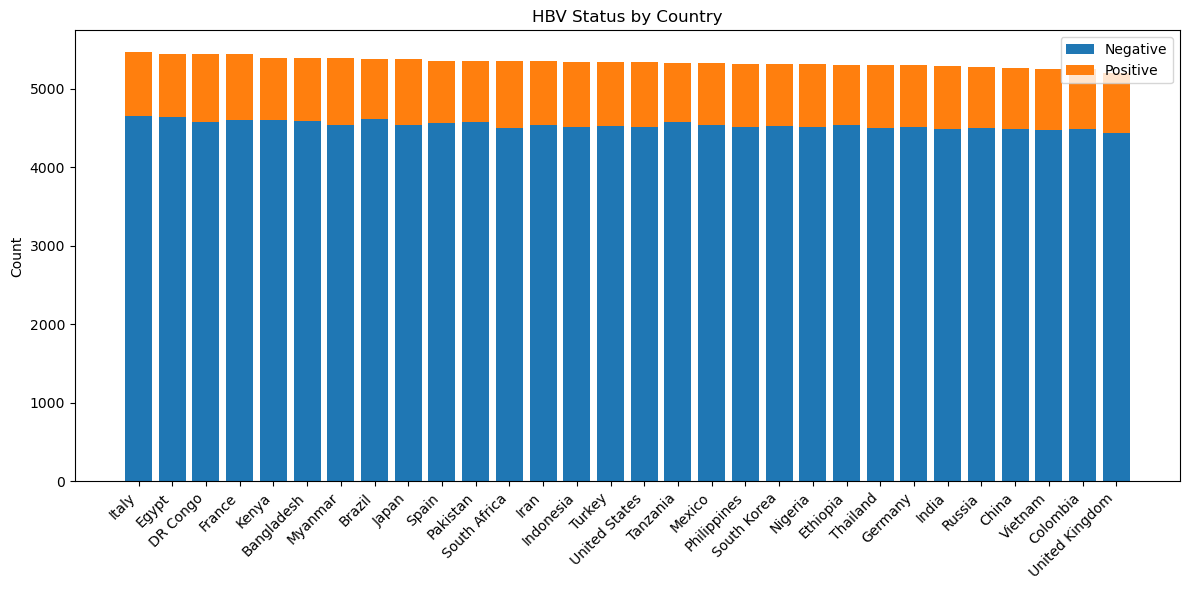

In [62]:
# 5. Hepatitis B status
print(df['Hepatitis_B_Status'].value_counts())
hbv_ct = (df.groupby(['Country', 'Hepatitis_B_Status']).size().unstack('Hepatitis_B_Status', fill_value=0))
hbv_ct = hbv_ct[['Negative','Positive']]
hbv_ct = hbv_ct.assign(hbv=hbv_ct['Negative']+hbv_ct['Positive']).sort_values('hbv', ascending=False).drop(columns='hbv')
hbv_countries = hbv_ct.index.tolist()

plt.figure(figsize=(12, 6))
plt.bar(x_ctr, hbv_ct['Negative'].values, label='Negative')
plt.bar(x_ctr, hbv_ct['Positive'].values, bottom=hbv_ct['Negative'].values, label='Positive')
plt.xticks(x_ctr, hbv_countries, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('HBV Status by Country')
plt.legend()
plt.tight_layout()
plt.savefig("figure/HBVstatusByCountry.png", dpi=300, bbox_inches="tight")
plt.show()

Diabetes
No     128412
Yes     31880
Name: count, dtype: int64


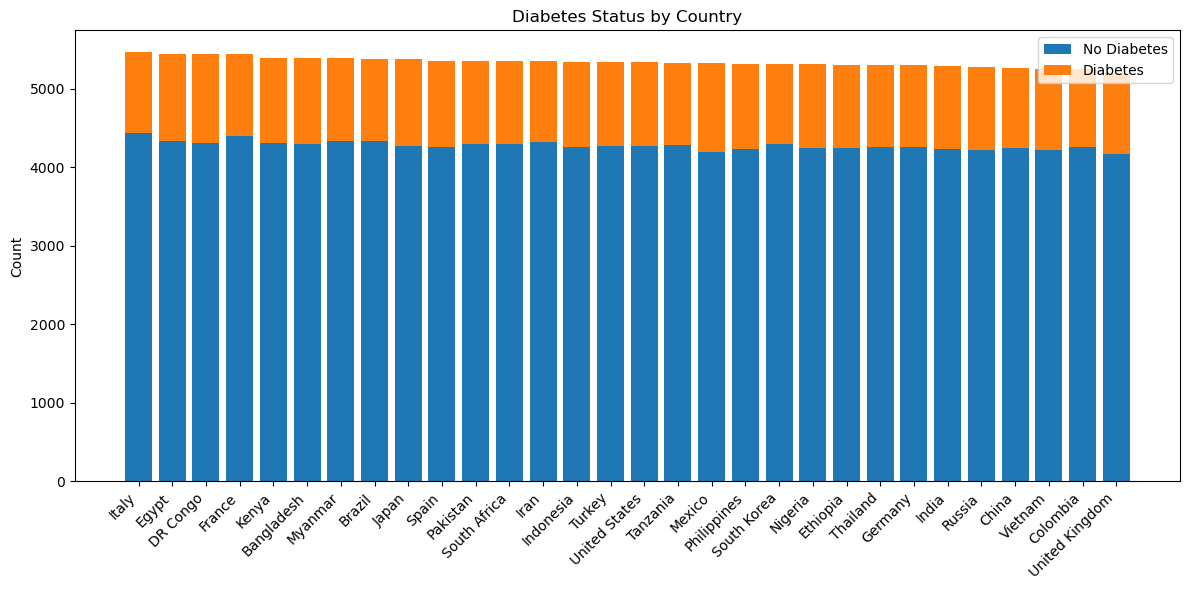

In [68]:
# 8. Diabetes
print(df['Diabetes'].value_counts())
dbt_ct = (df.groupby(['Country', 'Diabetes']).size().unstack('Diabetes', fill_value=0))
dbt_ct = dbt_ct[['No','Yes']]
dbt_ct = dbt_ct.assign(dbt=dbt_ct['No']+dbt_ct['Yes']).sort_values('dbt', ascending=False).drop(columns='dbt')
dbt_countries = dbt_ct.index.tolist()

plt.figure(figsize=(12, 6))
plt.bar(x_ctr, dbt_ct['No'].values, label='No Diabetes')
plt.bar(x_ctr, dbt_ct['Yes'].values, bottom=dbt_ct['No'].values, label='Diabetes')
plt.xticks(x_ctr, dbt_countries, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Diabetes Status by Country')
plt.legend()
plt.tight_layout()
plt.savefig("figure/diabetesByCountry.png", dpi=300, bbox_inches="tight")
plt.show()

Rural_or_Urban
Rural    96330
Urban    63962
Name: count, dtype: int64


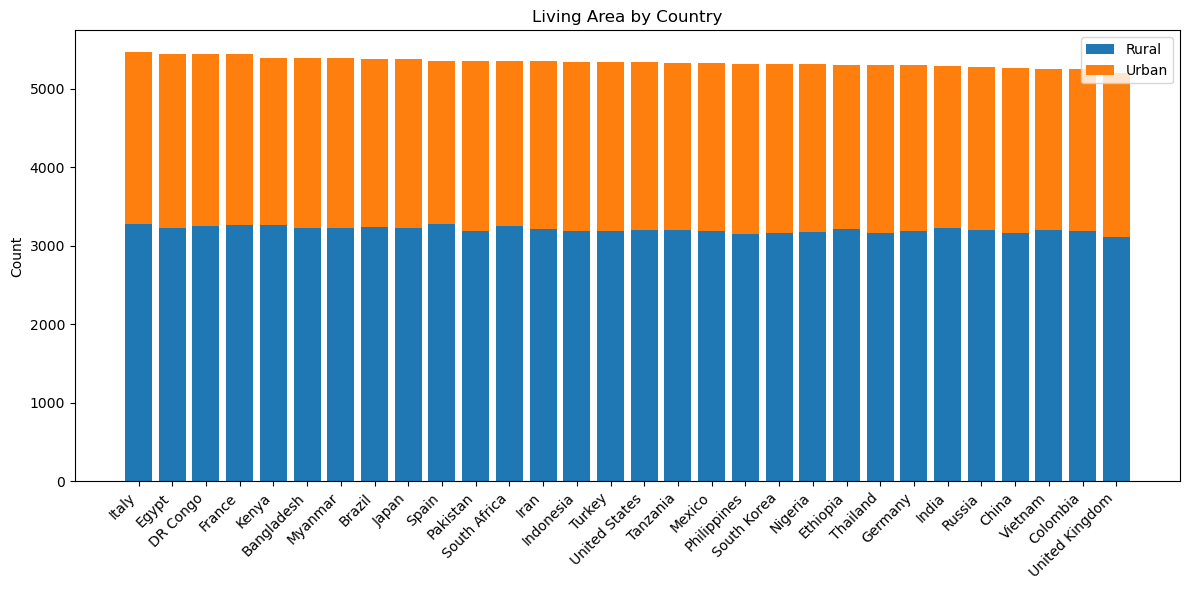

In [51]:
# 9. Rural or Urban
print(df['Rural_or_Urban'].value_counts())
rou_ct = (df.groupby(['Country', 'Rural_or_Urban']).size().unstack('Rural_or_Urban', fill_value=0))
rou_ct = rou_ct[['Rural','Urban']]
rou_ct = rou_ct.assign(rou=rou_ct['Rural']+rou_ct['Urban']).sort_values('rou', ascending=False).drop(columns='rou')
rou_countries = rou_ct.index.tolist()

plt.figure(figsize=(12, 6))
plt.bar(x_ctr, rou_ct['Rural'].values, label='Rural')
plt.bar(x_ctr, rou_ct['Urban'].values, bottom=rou_ct['Rural'].values, label='Urban')
plt.xticks(x_ctr, rou_countries, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Living Area by Country')
plt.legend()
plt.tight_layout()
plt.show()

Seafood_Consumption
High      53818
Low       53463
Medium    53011
Name: count, dtype: int64


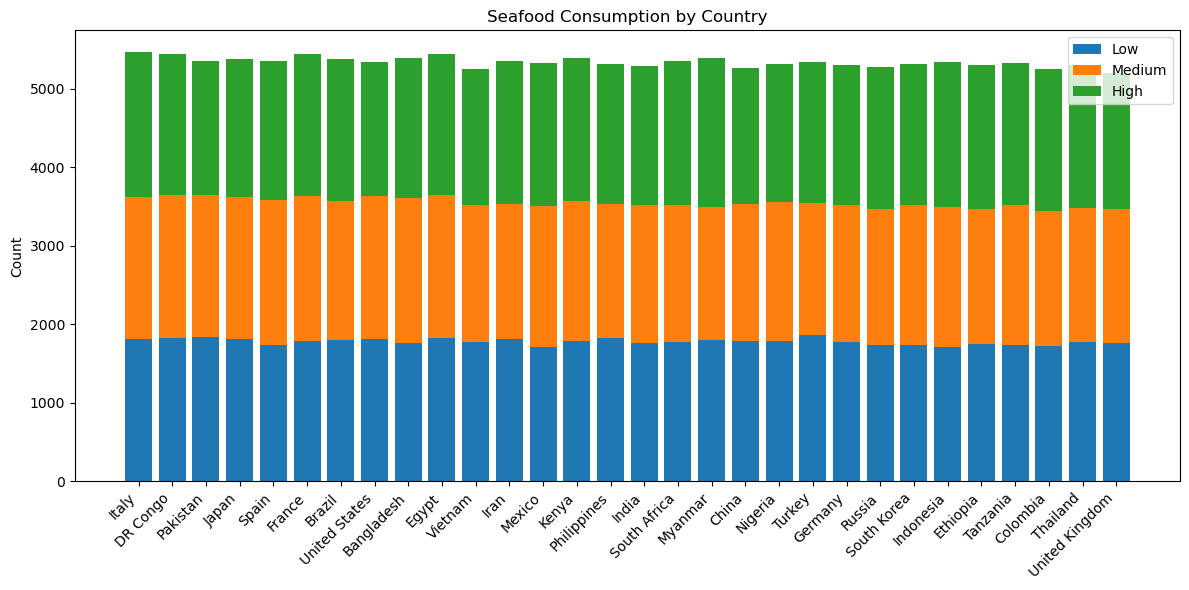

In [52]:
# 10. Seafood consumption
print(df['Seafood_Consumption'].value_counts())
sf_ct = (df.groupby(['Country', 'Seafood_Consumption']).size().unstack('Seafood_Consumption', fill_value=0))
sf_ct = sf_ct[['Low','Medium','High']]
sf_ct = sf_ct.assign(sf=sf_ct['Low']+sf_ct['Medium']+alc_ct['High']).sort_values('sf', ascending=False).drop(columns='sf')
sf_countries = sf_ct.index.tolist()

plt.figure(figsize=(12, 6))
plt.bar(x_ctr, sf_ct['Low'].values, label='Low')
plt.bar(x_ctr, sf_ct['Medium'].values, bottom=sf_ct['Low'].values, label='Medium')
plt.bar(x_ctr, sf_ct['High'].values, bottom=sf_ct['Low']+sf_ct['Medium'].values, label='High')
plt.xticks(x_ctr, sf_countries, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Seafood Consumption by Country')
plt.legend()
plt.tight_layout()
plt.show()

Herbal_Medicine_Use
No     112024
Yes     48268
Name: count, dtype: int64


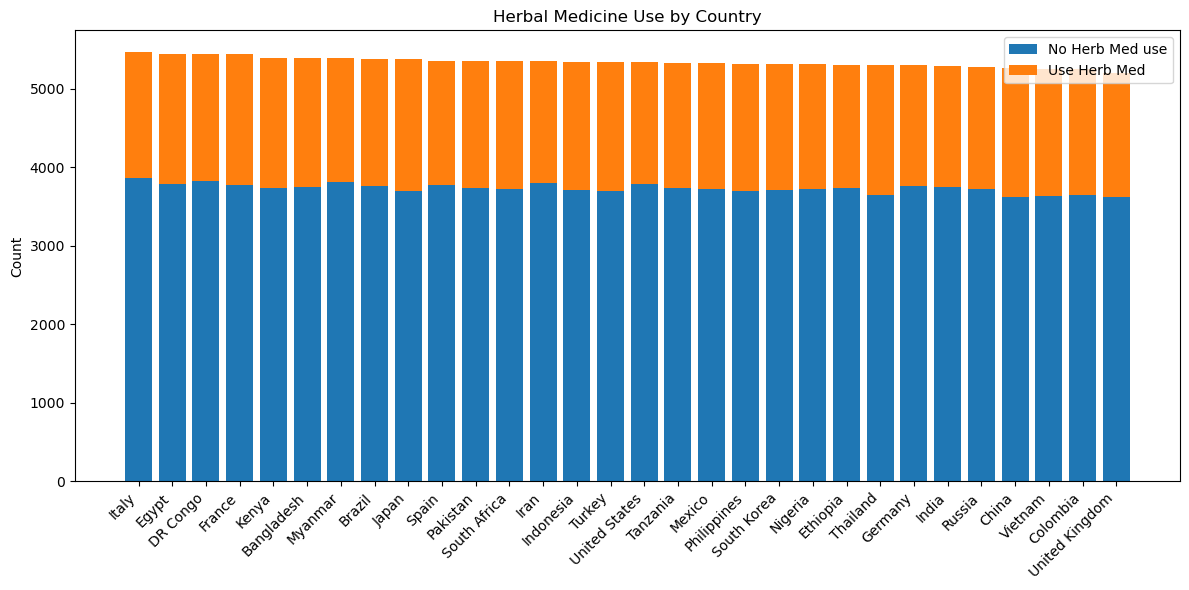

In [54]:
# 11. Herbal Medicine Use
print(df['Herbal_Medicine_Use'].value_counts())
hm_ct = (df.groupby(['Country', 'Herbal_Medicine_Use']).size().unstack('Herbal_Medicine_Use', fill_value=0))
hm_ct = hm_ct[['No','Yes']]
hm_ct = hm_ct.assign(hm=hm_ct['No']+hm_ct['Yes']).sort_values('hm', ascending=False).drop(columns='hm')
hm_countries = hm_ct.index.tolist()

plt.figure(figsize=(12, 6))
plt.bar(x_ctr, hm_ct['No'].values, label='No Herb Med use')
plt.bar(x_ctr, hm_ct['Yes'].values, bottom=hm_ct['No'].values, label='Use Herb Med')
plt.xticks(x_ctr, hm_countries, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Herbal Medicine Use by Country')
plt.legend()
plt.tight_layout()
plt.show()

Healthcare_Access
Moderate    64191
Poor        48071
Good        48030
Name: count, dtype: int64


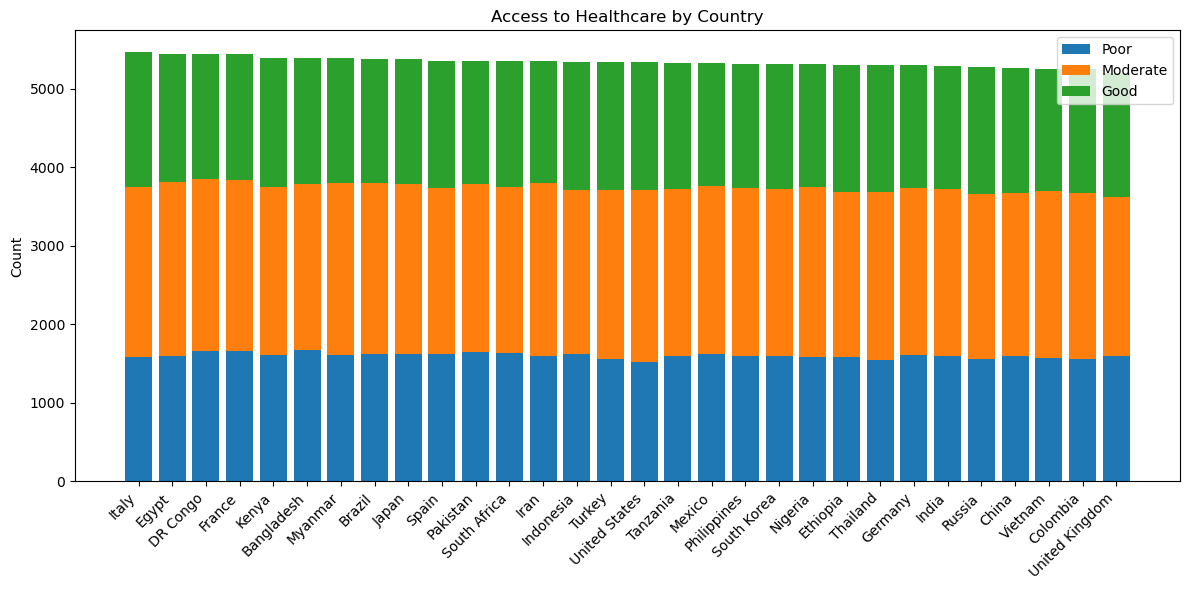

In [56]:
# 12. Healthcare access
print(df['Healthcare_Access'].value_counts())
ha_ct = (df.groupby(['Country', 'Healthcare_Access']).size().unstack('Healthcare_Access', fill_value=0))
ha_ct = ha_ct[['Poor','Moderate','Good']]
ha_ct = ha_ct.assign(ha=ha_ct['Poor']+ha_ct['Moderate']+ha_ct['Good']).sort_values('ha', ascending=False).drop(columns='ha')
ha_countries = ha_ct.index.tolist()

plt.figure(figsize=(12, 6))
plt.bar(x_ctr, ha_ct['Poor'].values, label='Poor')
plt.bar(x_ctr, ha_ct['Moderate'].values, bottom=ha_ct['Poor'].values, label='Moderate')
plt.bar(x_ctr, ha_ct['Good'].values, bottom=ha_ct['Poor']+ha_ct['Moderate'].values, label='Good')
plt.xticks(x_ctr, ha_countries, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Access to Healthcare by Country')
plt.legend()
plt.tight_layout()
plt.show()

Screening_Availability
Not Available    96065
Available        64227
Name: count, dtype: int64


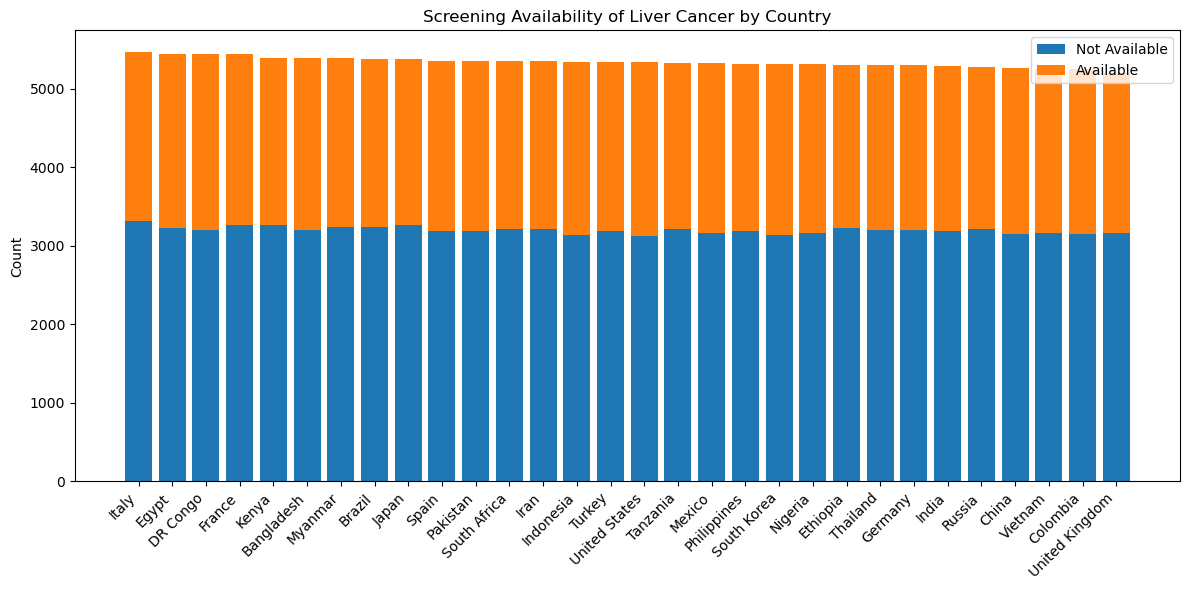

In [64]:
# 13. Screening availability
print(df['Screening_Availability'].value_counts())
sa_ct = (df.groupby(['Country', 'Screening_Availability']).size().unstack('Screening_Availability', fill_value=0))
sa_ct = sa_ct[['Not Available','Available']]
sa_ct = sa_ct.assign(sa=sa_ct['Not Available']+sa_ct['Available']).sort_values('sa', ascending=False).drop(columns='sa')
sa_countries = sa_ct.index.tolist()

plt.figure(figsize=(12, 6))
plt.bar(x_ctr, sa_ct['Not Available'].values, label='Not Available')
plt.bar(x_ctr, sa_ct['Available'].values, bottom=sa_ct['Not Available'].values, label='Available')
plt.xticks(x_ctr, sa_countries, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Screening Availability of Liver Cancer by Country')
plt.legend()
plt.tight_layout()
plt.savefig("figure/screenAvailByCountry.png", dpi=300, bbox_inches="tight")
plt.show()

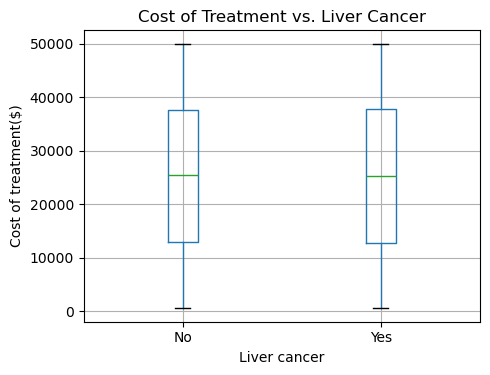

In [85]:
# Cost of treatment vs. Liver cancer pred
df[['Cost_of_Treatment','Prediction']].boxplot(by='Prediction',figsize=(5,4))
plt.ylabel('Cost of treatment($)')
plt.xlabel('Liver cancer')
plt.suptitle('')
plt.title('Cost of Treatment vs. Liver Cancer')
plt.tight_layout()
plt.savefig("figure/CoTvsPred.png", dpi=300, bbox_inches="tight")
plt.show()

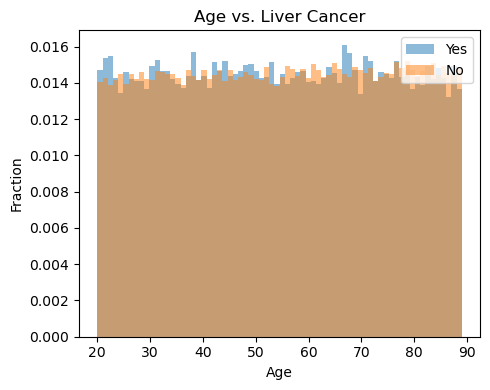

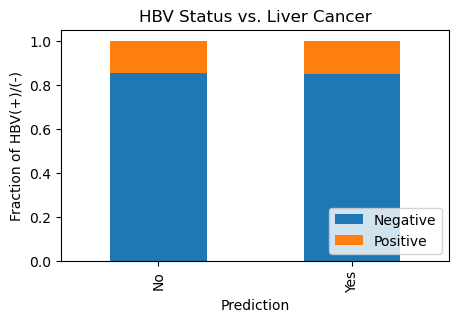

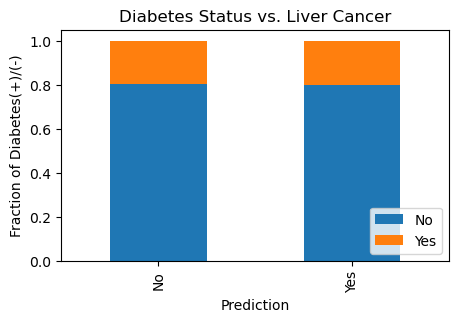

In [112]:
# Age vs. Liver cancer pred
categories = df['Prediction'].unique()
bin_range = (df['Age'].min(),df['Age'].max())

plt.figure(figsize=(5,4))

for c in categories:
    plt.hist(df[df['Prediction']==c]['Age'],alpha=0.5,label=c,range=bin_range,bins=70,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('Age')
plt.title('Age vs. Liver Cancer')
plt.tight_layout()
plt.savefig("figure/Age_Pred.png", dpi=300, bbox_inches="tight")
plt.show()

# HBV vs. Liver cancer pred
hb_pred_ct = df.groupby(['Prediction', 'Hepatitis_B_Status']).size().unstack()
hb_pred_norm = hb_pred_ct.div(hb_pred_ct.sum(axis=1),axis=0)
hb_pred_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('Fraction of HBV(+)/(-)')
plt.title('HBV Status vs. Liver Cancer')
plt.legend(loc=4)
plt.savefig("figure/HBVvsPred.png", dpi=300, bbox_inches="tight")
plt.show()

# Diabetes vs. Liver cancer pred
diab_pred_ct = df.groupby(['Prediction', 'Diabetes']).size().unstack()
diab_pred_norm = diab_pred_ct.div(diab_pred_ct.sum(axis=1),axis=0)
diab_pred_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('Fraction of Diabetes(+)/(-)')
plt.title('Diabetes Status vs. Liver Cancer')
plt.legend(loc=4)
plt.savefig("figure/DiabvsPred.png", dpi=300, bbox_inches="tight")
plt.show()

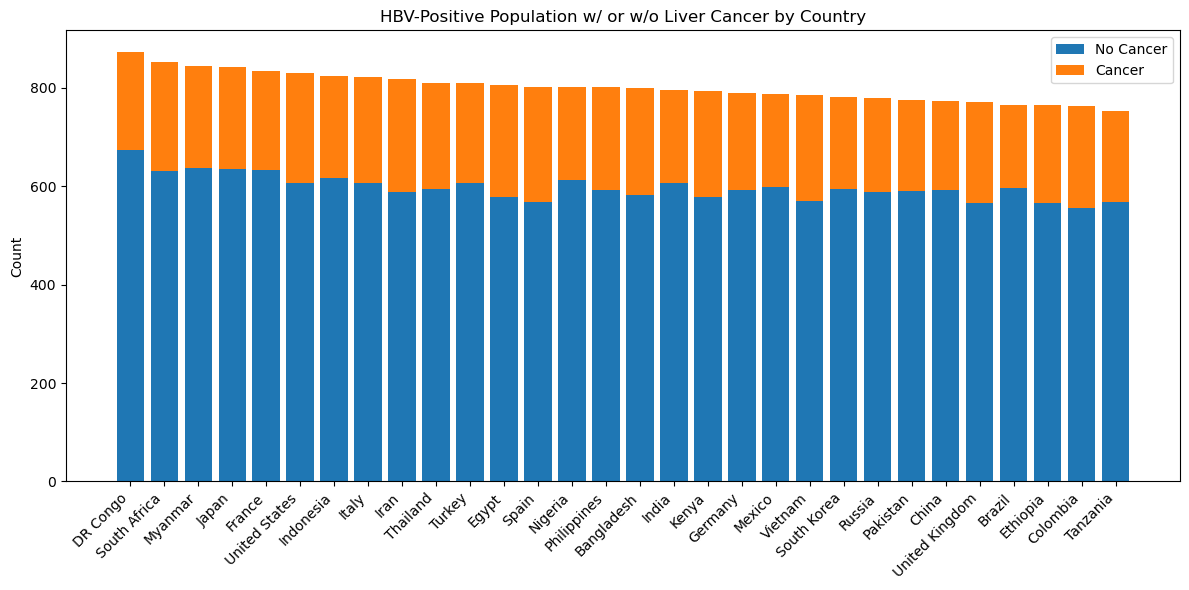

In [72]:
hbv1 = df['Hepatitis_B_Status'].astype(str).str.strip().str.lower()
hbv_pos_mask = (
    hbv1.isin(['positive','pos','yes','y','1','true']) |
    hbv1.str.contains(r'\bpos|\+', regex=True)
)
df_hbv1 = df[hbv_pos_mask].copy()

count_hbv1 = (df_hbv1.groupby(['Country','Prediction'])
                  .size()
                  .unstack('Prediction', fill_value=0)
                  .reindex(columns=['No','Yes'], fill_value=0))
count_hbv1 = count_hbv1.assign(_total=count_hbv1.sum(1)).sort_values('_total', ascending=False).drop(columns='_total')
hbv1_countries = count_hbv1.index.tolist()

plt.figure(figsize=(12,6))
plt.bar(x_ctr, count_hbv1['No'].values, label='No Cancer')
plt.bar(x_ctr, count_hbv1['Yes'].values, bottom=count_hbv1['No'].values, label='Cancer')
plt.xticks(x_ctr, hbv1_countries, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('HBV-Positive Population w/ or w/o Liver Cancer by Country')
plt.legend()
plt.tight_layout()
plt.savefig('figure/hbv+_by_country_pred.png', dpi=300, bbox_inches='tight')
plt.show()

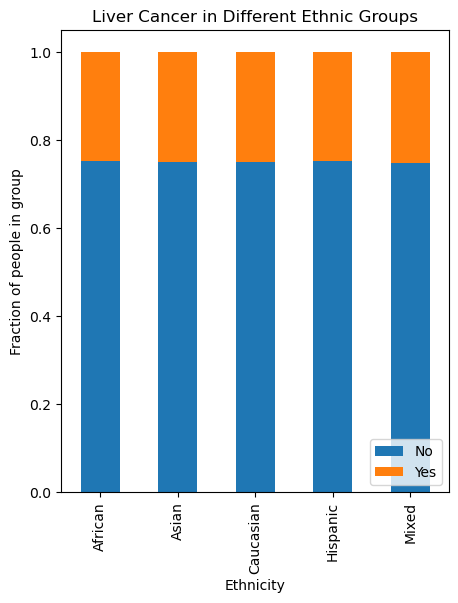

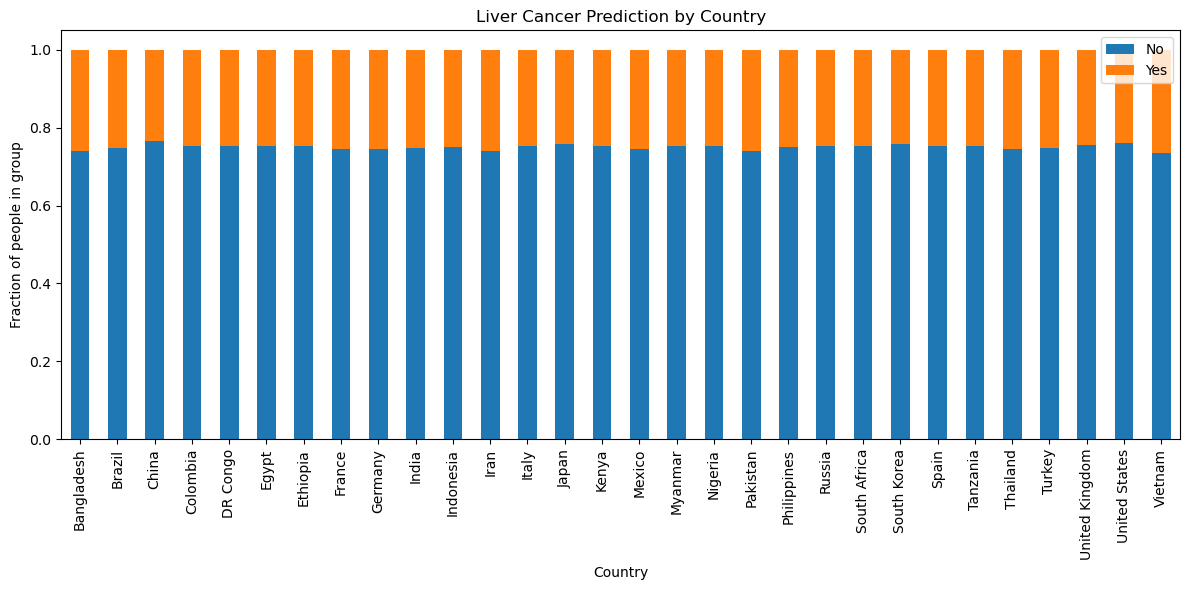

In [97]:
eth_pred = df.groupby(['Ethnicity', 'Prediction']).size().unstack()
eth_pred_norm = eth_pred.div(eth_pred.sum(axis=1),axis=0)
eth_pred_norm.plot(kind='bar', stacked=True,figsize=(5,6))
plt.ylabel('Fraction of people in group')
plt.title('Liver Cancer in Different Ethnic Groups')
plt.legend(loc=4)
plt.savefig('figure/ethVSpred.png', dpi=300, bbox_inches='tight')
plt.show()

country_pred = df.groupby(['Country', 'Prediction']).size().unstack()
country_pred_norm = country_pred.div(country_pred.sum(axis=1),axis=0)
country_pred_norm.plot(kind='bar', stacked=True,figsize=(12,6))
plt.ylabel('Fraction of people in group')
plt.title('Liver Cancer Prediction by Country')
plt.legend()
plt.tight_layout()
plt.savefig("figure/Country_Pred.png", dpi=300, bbox_inches="tight")
plt.show()

In [99]:
print(eth_pred_norm)
ranked = eth_pred_norm.fillna(0).sort_values(by="Yes", ascending=False)
ethnicity_order = ranked.index.tolist()
print(ranked["Yes"])
print(ethnicity_order)     

Prediction        No       Yes
Ethnicity                     
African     0.752337  0.247663
Asian       0.748834  0.251166
Caucasian   0.750573  0.249427
Hispanic    0.751434  0.248566
Mixed       0.748409  0.251591
Ethnicity
Mixed        0.251591
Asian        0.251166
Caucasian    0.249427
Hispanic     0.248566
African      0.247663
Name: Yes, dtype: float64
['Mixed', 'Asian', 'Caucasian', 'Hispanic', 'African']


In [100]:
print(ethnicity_order)  

['Mixed', 'Asian', 'Caucasian', 'Hispanic', 'African']


In [102]:
print(country_pred_norm)
cranked = country_pred_norm.fillna(0).sort_values(by="Yes", ascending=False)
c_order = cranked.index.tolist()
print(cranked["Yes"])
print(c_order) 

Prediction            No       Yes
Country                           
Bangladesh      0.740349  0.259651
Brazil          0.748375  0.251625
China           0.766774  0.233226
Colombia        0.752044  0.247956
DR Congo        0.752019  0.247981
Egypt           0.751698  0.248302
Ethiopia        0.754098  0.245902
France          0.744947  0.255053
Germany         0.744532  0.255468
India           0.747683  0.252317
Indonesia       0.749532  0.250468
Iran            0.741267  0.258733
Italy           0.753152  0.246848
Japan           0.757993  0.242007
Kenya           0.751901  0.248099
Mexico          0.745168  0.254832
Myanmar         0.752042  0.247958
Nigeria         0.753151  0.246849
Pakistan        0.740299  0.259701
Philippines     0.750000  0.250000
Russia          0.752745  0.247255
South Africa    0.753499  0.246501
South Korea     0.759029  0.240971
Spain           0.752285  0.247715
Tanzania        0.752624  0.247376
Thailand        0.745242  0.254758
Turkey          0.74

In [104]:
print(c_order[:5]) 

['Vietnam', 'Pakistan', 'Bangladesh', 'Iran', 'Germany']


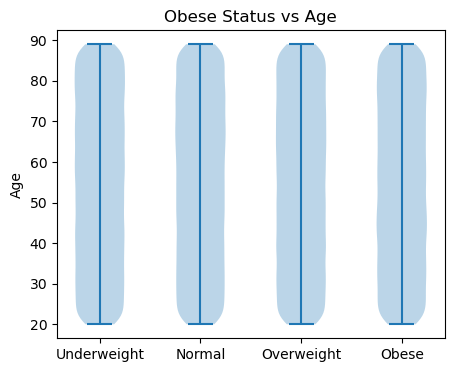

In [113]:
# Age vs Obese
ob_ds = [df[df['Obesity']=='Underweight']['Age'].values,
         df[df['Obesity']=='Normal']['Age'].values,
         df[df['Obesity']=='Overweight']['Age'].values,
         df[df['Obesity']=='Obese']['Age'].values]

plt.figure(figsize=(5,4))
plt.violinplot(dataset = ob_ds)
plt.xticks([1,2,3,4],['Underweight','Normal','Overweight','Obese'])
plt.ylabel('Age')
plt.title('Obese Status vs Age')
plt.savefig('figure/Age_obese.png', dpi=300, bbox_inches='tight')
plt.show()

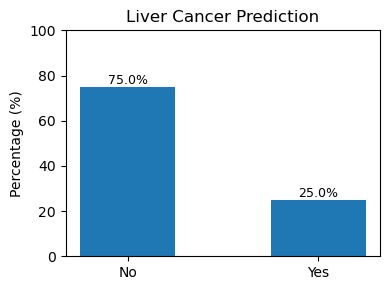

In [143]:
counts = df['Prediction'].astype(str).str.strip().str.lower().value_counts()
labels = ['No', 'Yes']
heights = [counts.get('no', 0), counts.get('yes', 0)]
total = sum(heights)
perc = [ (h / total) * 100 if total else 0 for h in heights ]

plt.figure(figsize=(4,3))
plt.bar(labels, perc, width=0.5)
plt.ylabel('Percentage (%)')
plt.title('Liver Cancer Prediction')
plt.ylim(0, 100)
for i, v in enumerate(perc):
    plt.text(i, v, f"{v:.1f}%", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.savefig('figure/livpred.png', transparent = True, dpi=300, bbox_inches='tight')
plt.show()

### Problem 1c (10 points)

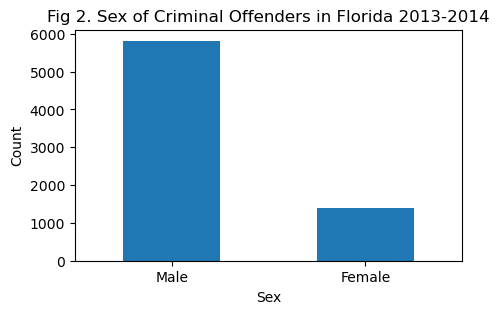

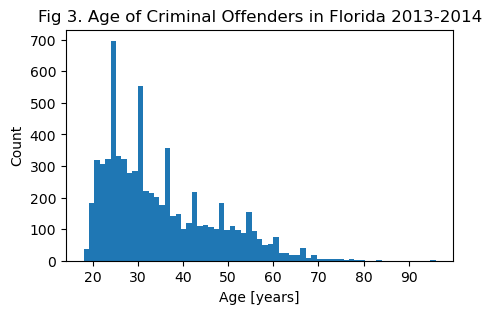

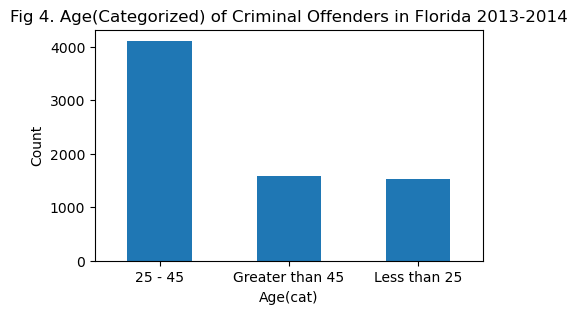

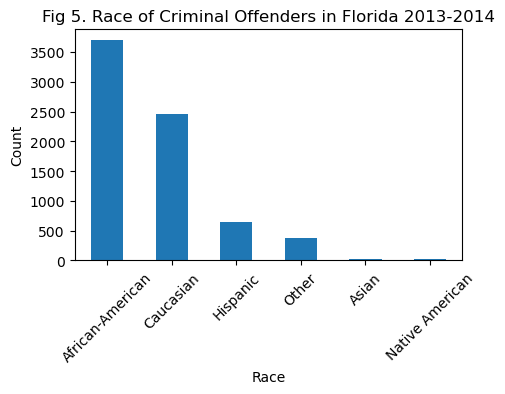

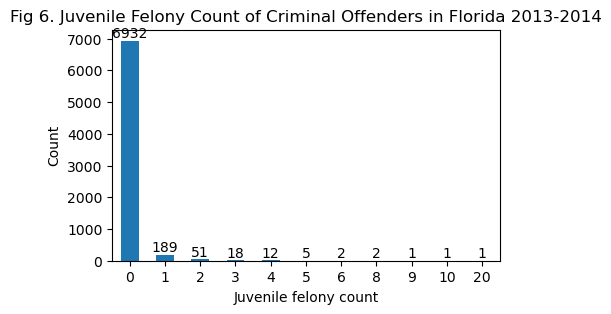

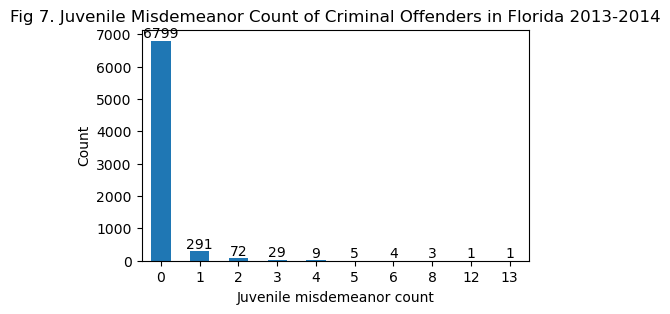

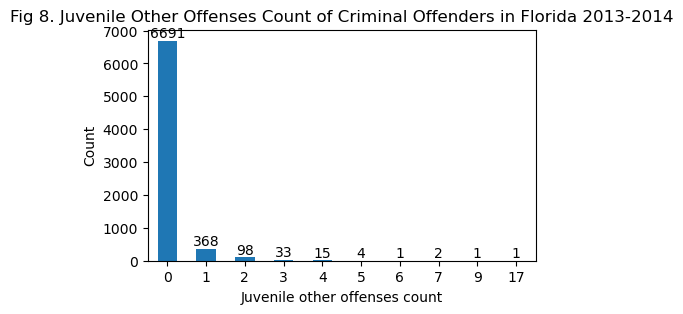

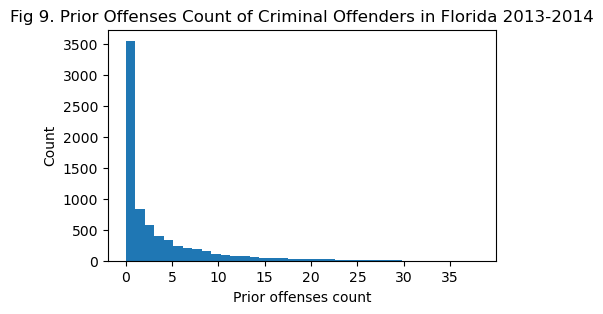

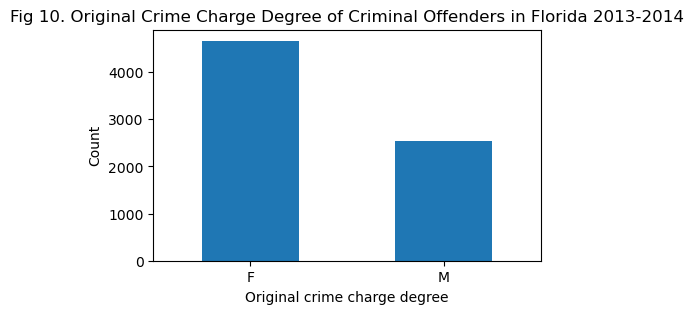

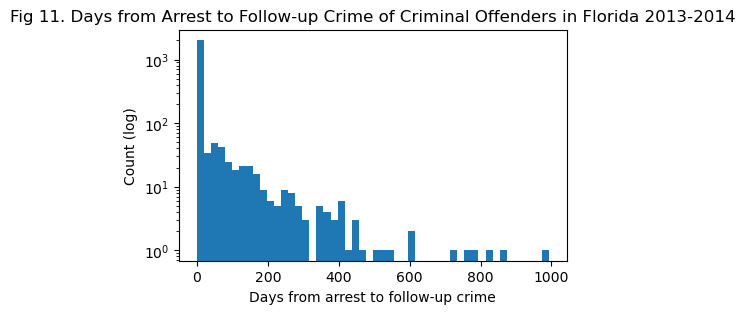

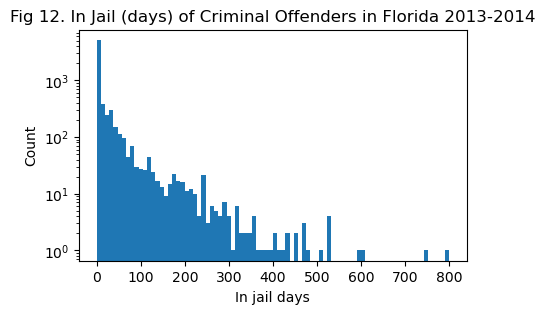

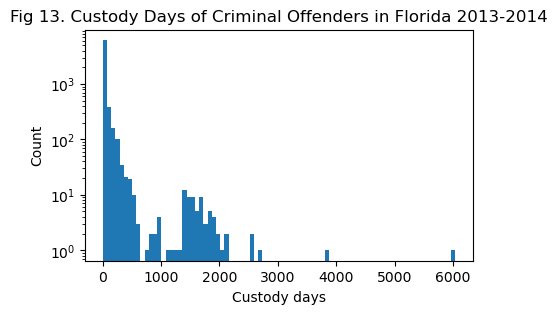

In [56]:

# 2. age
plt.figure(figsize=(5,3))
cro_df['age'].plot.hist(bins = cro_df['age'].nunique()) 
plt.xlabel('Age [years]')
plt.ylabel('Count')
plt.title('Fig 3. Age of Criminal Offenders in Florida 2013-2014')
plt.show()

# 3. age_cat
plt.figure(figsize=(5,3))
cro_df['age_cat'].value_counts().plot.bar()
plt.xlabel('Age(cat)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Fig 4. Age(Categorized) of Criminal Offenders in Florida 2013-2014')
plt.show()

# 4. race
plt.figure(figsize=(5,3))
cro_df['race'].value_counts().plot.bar()
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Fig 5. Race of Criminal Offenders in Florida 2013-2014')
plt.show()

# 5. juv_fel_count
# print(cro_df['juv_fel_count'].value_counts())
plt.figure(figsize=(5,3))
ax = cro_df['juv_fel_count'].value_counts().sort_index().plot.bar()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.xlabel('Juvenile felony count')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Fig 6. Juvenile Felony Count of Criminal Offenders in Florida 2013-2014')
plt.show()

# 6. juv_misd_count
# print(cro_df['juv_misd_count'].value_counts())
plt.figure(figsize=(5,3))
ax = cro_df['juv_misd_count'].value_counts().sort_index().plot.bar()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.xlabel('Juvenile misdemeanor count')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Fig 7. Juvenile Misdemeanor Count of Criminal Offenders in Florida 2013-2014')
plt.show()

# 7. juv_other_count
# print(cro_df['juv_other_count'].value_counts())
plt.figure(figsize=(5,3))
ax = cro_df['juv_other_count'].value_counts().sort_index().plot.bar()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.xlabel('Juvenile other offenses count')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Fig 8. Juvenile Other Offenses Count of Criminal Offenders in Florida 2013-2014')
plt.show()

# 8. priors_count
# print(cro_df['priors_count'].value_counts())
plt.figure(figsize=(5,3))
cro_df['priors_count'].plot.hist(bins = cro_df['priors_count'].nunique()) 
plt.xlabel('Prior offenses count')
plt.ylabel('Count')
plt.title('Fig 9. Prior Offenses Count of Criminal Offenders in Florida 2013-2014')
plt.show()

# 9. c_charge_degree
plt.figure(figsize=(5,3))
cro_df['c_charge_degree'].value_counts().plot.bar()
plt.xlabel('Original crime charge degree')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Fig 10. Original Crime Charge Degree of Criminal Offenders in Florida 2013-2014')
plt.show()

# 10. r_days_from_arrest
# print(cro_df['r_days_from_arrest'].value_counts())
plt.figure(figsize=(5,3))
plt.hist(cro_df['r_days_from_arrest'], bins=50, log=True)
plt.xlabel('Days from arrest to follow-up crime')
plt.ylabel('Count (log)')
plt.title('Fig 11. Days from Arrest to Follow-up Crime of Criminal Offenders in Florida 2013-2014')
plt.show()

# 11. c_jail_days
# print(cro_df['c_jail_days'].value_counts())
plt.figure(figsize=(5,3))
cro_df['c_jail_days'].plot.hist(bins = int(np.sqrt(cro_df.shape[0])), log=True) 
plt.xlabel('In jail days')
plt.ylabel('Count')
plt.title('Fig 12. In Jail (days) of Criminal Offenders in Florida 2013-2014')
plt.show()

# 12. custody_days
# print(cro_df['custody_days'].value_counts())
plt.figure(figsize=(5,3))
cro_df['custody_days'].plot.hist(bins = int(np.sqrt(cro_df.shape[0])), log=True) 
plt.xlabel('Custody days')
plt.ylabel('Count')
plt.title('Fig 13. Custody Days of Criminal Offenders in Florida 2013-2014')
plt.show()

# use sklearn to split the dataset into 60% training, 20% validation, and 20% test sets
X_train, X_other, y_train, y_other = train_test_split(feature_mtx, targetV, train_size = 0.6,random_state = 42)
# print('training set:',X_train.shape, y_train.shape)
# print(X_other.shape, y_other.shape)

X_val, X_test, y_val, y_test = train_test_split(X_other,y_other, train_size = 0.5,random_state = 42)
# print('validation set:',X_val.shape, y_val.shape)
# print('test set:',X_test.shape, y_test.shape)
# print(X_train.head())

## Problem 2

You will preprocess the dataset in this problem. 

- First, you need to decide based on the dataset description, which features are continuous, ordinal, and categorical.
- Then you will write functions that perform fit-transform on the training set. The functions you create are tested with sklearn. The ability to implement algorithms is a strong indicator that you understand them and it is a crucial step in learning.
- Finally, you'll transform the validation and test sets using sklearn.

Follow the steps outined below.

### Problem 2a (10 points)

In [111]:
# import the necesasry packages
import polars as pl
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from collections import Counter

# complete these lists. Each feature name must appear exactly once in one of these lists
continuous_ftrs = ['age','juv_fel_count','juv_misd_count','juv_other_count','priors_count','r_days_from_arrest',
                   'c_jail_days','custody_days']
ordinal_ftrs = ['age_cat']
# for ordinal features, describe the ordered list of categories
ordinal_cats = {'age_cat':['Less than 25','25 - 45','Greater than 45']}
categorical_ftrs = ['sex','race','c_charge_degree']


def standard_scaler(df,continuous_ftrs):
    '''
    To standardize features (continuous_ftrs) by removing the mean and scaling to unit variance.
    
    Parameters:
    -----------

    df: a dataframe that contains your feature matrix
    continuous_ftrs: a list of the name(s) of the continuous features in the dataframe that need to be preprocessed
    

    Returns:
    --------
        a dataframe (df_scaled) that has all continuous feature(s) being scaled according to standard_scaler
    

    Example:
    --------

    >>> import numpy as np
    >>> from sklearn.model_selection import train_test_split
    >>> data = {
                'age': [18, 22, 30, 45, 50],
                'priors_count': [0, 2, 5, 10, 15],
                'sex': ['Male', 'Female', 'Male', 'Female', 'Male']
                }
    >>> df = pd.DataFrame(data)
    >>> continuous_ftrs = ['age', 'priors_count']
    >>> df_scaled = standard_scaler(df, continuous_ftrs)
    
    '''
    # as in the previous problem set, test the input(s) to the function
    if not isinstance(df, (pd.DataFrame, pl.DataFrame)):
        raise ValueError (f"The input of df must be a DataFrame. None dataframe type detected: {type(pd)}.")
    if not isinstance(continuous_ftrs, list):
        raise ValueError (f"The input of continuous_ftrs must be a list. Invalid type detected: {type(continuous_ftrs)}.")
    if not continuous_ftrs:
        raise ValueError("Empty continuous_ftrs list detected. At least one feature name is required.")
    dup_ftr = []
    for ftr, ct in Counter(continuous_ftrs).items():
        if ct > 1:
            dup_ftr.append()
    if dup_ftr:
        raise ValueError(f"Detect duplicates in `continuous_ftrs`: {dupes}. Remove before running the scaler.")

    error_ftr, non_num_ftr, ovar_ftr = [], [], []
    for ftr in continuous_ftrs:
        if ftr not in df.columns.tolist():
            error_ftr.append(ftr)
        if not pd.api.types.is_numeric_dtype(df[ftr]):
            non_num_ftr.append(ftr)
        if df[ftr].std() == 0:
            ovar_ftr.append(ftr)
    
    if error_ftr:
        raise ValueError (f"Unexpected feature(s) '{error_ftr}' found in the list, remove before running the scaler.")
    if non_num_ftr:
        raise ValueError (f"Non-numeric feature(s) detected '{non_num_ftr}', not a continous feature.")
    if ovar_ftr:
        raise ValueError(f"Features with zero variance cannot be standardized: {ovar_ftr}.")
   
    # implement the standard scaler and transform the input
    # you can use numpy, pandas or polars. do not use sklearn inside the function!
    df_copy = df.copy()
    df_copy[continuous_ftrs] = df_copy[continuous_ftrs].replace([np.inf, -np.inf], np.nan)

    for ftr in continuous_ftrs:    
        mu = df_copy[ftr].mean()
        sigma = df_copy[ftr].std(ddof=0)
        df_copy[ftr] = (df_copy[ftr] - mu) / sigma

    df_scaled = df_copy
    return df_scaled


# test the standard scaler output. call the sklearn standard scaler.
# check if the sklearn output and your output are identical
# if not, raise a ValueError and debug your code.
X_orig = X_train.copy(deep=True)
X_custom = standard_scaler(X_train, continuous_ftrs = continuous_ftrs)

scaler = StandardScaler()
X_sklearn = X_train.copy(deep=True)
X_sklearn[continuous_ftrs] = scaler.fit_transform(X_train[continuous_ftrs].to_numpy())

wr_col = []
for col in X_train.columns:
    if col not in continuous_ftrs:
        wr_col.append(col)
if wr_col and not X_custom[wr_col].equals(X_orig[wr_col]):
    raise ValueError(f"Feature(s) not in the requested list were modified by the custom scaler: {wr_col}.")

if not X_custom.index.equals(X_sklearn.index):
    raise ValueError("Unmatched index between custom output and sklearn output.")

if list(X_custom.columns) != list(X_sklearn.columns):
    raise ValueError("Unmatched column order and/or name(s) between custom output and sklearn output.")

custom_scaled = X_custom[continuous_ftrs].to_numpy(dtype=float)
sklearn_scaled = X_sklearn[continuous_ftrs].to_numpy(dtype=float)

if not np.allclose(custom_scaled, sklearn_scaled, equal_nan=True):
    all_diff = np.abs(custom_scaled - sklearn_scaled)
    r,c = np.unravel_index(np.argmax(all_diff), all_diff.shape)
    error_col = continuous_ftrs[c]
    raise ValueError(f"Unidentical value found between custom scaler and sklearn scaler at row {r} and in column {error_col}.")

print("The test of the custom standard_scaler passed")

The test of the custom standard_scaler passed


### Problem 2b (10 points)

In [112]:
def onehot_encoder(df,categorical_ftrs):
    '''
    To encode categorical features as a one-hot numeric array.
    
    Parameters:
    -----------

    df: a dataframe that contains your feature matrix
    categorical_ftrs: a list of the name(s) of the categorical features in the dataframe that need to be preprocessed
    

    Returns:
    --------
        a dataframe (df_onehot) that has all categorical feature(s) being preprocessed according to OneHotEncoder
    

    Example:
    --------

    >>> import numpy as np
    >>> from sklearn.model_selection import train_test_split
    >>> data = {
                'age': [18, 22, 30, 45, 50],
                'priors_count': [0, 2, 5, 10, 15],
                'education': ['master', 'graduate', 'bachelor', 'HS', 'master']
                }
    >>> df = pd.DataFrame(data)
    >>> categorical_ftrs = ['education']
    >>> df_onehot = onehot_encoder(df,categorical_ftrs)

    '''
    # test the input(s)
    if not isinstance(df, (pd.DataFrame, pl.DataFrame)):
        raise ValueError (f"The input of df must be a DataFrame. None dataframe type detected: {type(df)}.")
    if not isinstance(categorical_ftrs, list):
        raise ValueError (f"The input of categorical_ftrs must be a list. Invalid type detected: {type(categorical_ftrs)}.")
    if not categorical_ftrs:
        raise ValueError("Empty categorical_ftrs list detected. At least one feature name is required.")
    dup_ftr = []
    for ftr, ct in Counter(categorical_ftrs).items():
        if ct > 1:
            dup_ftr.append(ftr)
    if dup_ftr:
        raise ValueError(f"Detect duplicates in `categorical_ftrs`: {dup_ftr}. Remove before running the scaler.")

    error_ftr, non_cat_ftr= [], []
    for ftr in categorical_ftrs:
        if ftr not in df.columns.tolist():
            error_ftr.append(ftr)
        if not df[ftr].dtype == 'object' or df[ftr].dtype == 'bool':
            non_cat_ftr.append(ftr)
    
    if error_ftr:
        raise ValueError (f"Unexpected feature(s) '{error_ftr}' found in the list, remove before running the encoder.")
    if non_cat_ftr:
        raise ValueError (f"Invalid type of feature(s) detected '{non_cat_ftr}', not a categorical feature.")

    # implement the algorithm and transform the input
    # you can use numpy, pandas or polars. do not use sklearn inside the function!
    df_copy = df.copy()
    X_cat = df_copy[categorical_ftrs]
    n = len(X_cat)

    onehot_store, new_col, cat_used = [],[],[]
    for ftr in categorical_ftrs:
        values = X_cat[ftr].to_numpy()
        add_cat = np.unique(values)
        cat_used.append(add_cat)
        new_block = np.zeros((n, len(add_cat)), dtype=np.float64)

        for i, cat in enumerate(add_cat):
            if pd.isna(cat):
                mask = pd.isna(values)
                col_name = f"{ftr}_nan"
            else:
                mask = (values == cat)
                col_name = f"{ftr}_{cat}"

            new_block[mask, i] = 1.0
            new_col.append(col_name)

        onehot_store.append(new_block) 

    onehot = np.concatenate(onehot_store, axis=1)
    df_onehot = onehot, np.array(new_col, dtype=object), cat_used
    return df_onehot

# test the one-hot encoder output. call the sklearn OHE.
# check if the sklearn output and your output are identical
# if not, raise a ValueError and debug your code.
X_orig = X_train.copy(deep=True)
X_custom, custom_ftr, custom_cats = onehot_encoder(X_orig, categorical_ftrs = categorical_ftrs)

enc = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
enc.fit(X_sklearn[categorical_ftrs])
onehot_train = enc.transform(X_sklearn[categorical_ftrs])
sklearn_ftr = enc.get_feature_names_out(categorical_ftrs)

if not np.array_equal(custom_ftr, sklearn_ftr):
    raise ValueError("Feature names does not match between custom OneHotEncode and sklearn OneHotEncode.")

if not np.allclose(X_custom, onehot_train, atol=0, equal_nan=True):
    all_diff = np.abs(custom_scaled - sklearn_scaled)
    r,c = np.unravel_index(np.argmax(all_diff), all_diff.shape)
    error_col = categorical_ftrs[c]
    raise ValueError(f"Unidentical value found between custom OneHotEncode and sklearn OneHotEncode at row {r} and in column {error_col}.")

print("The test of the custom onehot_encoder passed")

The test of the custom onehot_encoder passed


### Problem 2c (10 points)

In [119]:
def ordinal_encoder(df, ordinal_ftrs, ordinal_cats):
    '''
    To encode categorical features as an ordinal integer array.
   
    Parameters:
    -----------

    df: a dataframe that contains your feature matrix
    ordinal_ftrs: a list of the name(s) of the ordinal features in the dataframe that need to be preprocessed
    ordinal_cats: the ordered categories for each ordinal feature from lowest to highest
    

    Returns:
    --------
        a dataframe (df_scaled) that has ordinal feature(s) being encoded according to ordinal_encode
    

    Example:
    --------

    >>> import numpy as np
    >>> from sklearn.model_selection import train_test_split
    >>> data = {
                'age': [18, 22, 30, 45, 50],
                'priors_count': [0, 2, 5, 10, 15],
                'satisfacion': ['not satisfied', 'slightly not satisfied', 'neutral', 'slightly satisfied', 'satisfied']
                }
    >>> df = pd.DataFrame(data)
    >>> ordinal_ftrs = ['satisfacion']
    >>> ordinal_cats = ['satisfaction':['not satisfied', 'slightly not satisfied', 'neutral', 'slightly satisfied', 'satisfied']]
    >>> df_ordinal = ordinal_encoder(df, ordinal_ftrs, ordinal_cats)

    Why do we need the ordinal_ftrs and ordinal_cats as inputs?
    There are two different variables for ordinal encoder.
    Ordinal_ftrs is to let the function know which specific columns in the dataset contain ordinal data that needs transformation.
    Ordinal_cats is to let the function specify the inherent, meaningful order inside those categories.

    '''
    # test the input(s)
    if not isinstance(df, (pd.DataFrame, pl.DataFrame)):
        raise ValueError (f"The input of df must be a DataFrame. None dataframe type detected: {type(df)}.")
    if not isinstance(ordinal_ftrs, list):
        raise ValueError (f"The input of ordinal_ftrs must be a list. Invalid type detected: {type(ordinal_ftrs)}.")   
    if not ordinal_ftrs:
        raise ValueError("Empty categorical_ftrs list detected. At least one feature name is required.")
    if not isinstance(ordinal_cats, dict):
        raise ValueError (f"The input of ordinal_cats must be a dictionary. Invalid type detected: {type(ordinal_cats)}.")   
    if not ordinal_cats:
        raise ValueError("Empty categorical_cats list detected. At least one type of ordered features is required.")

    dup_ftr, dup_cats, dup_cf = [],[],[]
    for ftr, ct in Counter(ordinal_ftrs).items():
        if ct > 1:
            dup_ftr.append(ftr)
            
        cats = list(ordinal_cats[ftr])
        if len(set(cats)) != len(cats):
            dup_cats.append(cats)
            dup_cf.append(ftr)

    if dup_ftr:
        raise ValueError(f"Detect duplicates in `ordinal_ftrs`: {dup_ftr}. Remove before running the ordinal encode.")
    if dup_cats:
        raise ValueError(f"Detect duplicates in `ordinal_cats`: {dup_cats} from '{dup_cf}'. Remove before running the ordinal encode.")

    error_ftr, non_ord_ftr= [], []
    for ftr in ordinal_ftrs:
        if ftr not in df.columns.tolist():
            error_ftr.append(ftr)
        if not df[ftr].dtype == 'object':
            non_ord_ftr.append(ftr)
    
    if error_ftr:
        raise ValueError (f"Unexpected feature(s) '{error_ftr}' found in the list, remove before running the encoder.")
    if non_ord_ftr:
        raise ValueError (f"Invalid type of feature(s) detected '{non_ord_ftr}', not a ordinal feature.")

    # implement the algorithm and transform the input
    # you can use numpy, pandas or polars. do not use sklearn inside the function!
    df_copy = df.copy()

    for ftr in ordinal_ftrs:
        cats = list(ordinal_cats[ftr])
        mapping = {}
        for i, c in enumerate(cats):
            mapping[c] = i

        df_copy[ftr] = df_copy[ftr].map(mapping).fillna(-1).astype("int64")

    df_ordinal = df_copy
    
    return df_ordinal

# test the ordinal encoder output. call the sklearn OE.
# check if the sklearn output and your output are identical
# if not, raise a ValueError and debug your code.
custom_oe = ordinal_encoder(X_orig, ordinal_ftrs = ordinal_ftrs, ordinal_cats = ordinal_cats)
custom_ar = custom_oe[ordinal_ftrs].to_numpy().astype(float)

ord_cats = [['Less than 25','25 - 45','Greater than 45']]
enc_oe = OrdinalEncoder(categories = ord_cats, handle_unknown='use_encoded_value', unknown_value=-1)
enc_oe.fit(X_sklearn[ordinal_ftrs])
sklearn_oe = enc_oe.transform(X_sklearn[ordinal_ftrs])

if custom_ar.shape != sklearn_oe.shape:
    raise ValueError(f"Something wrong with custom ordinal_encoder. Unmatched shape found: custom {custom_ar.shape}; sklearn {sklearn_oe.shape}.")

if not np.array_equal(custom_ar, sklearn_oe):
    diff = custom_ar - sklearn_oe
    r,c = np.argwhere(diff != 0)[0]
    ftr = ordinal_ftrs[c]
    raise ValueError(
        f"Unidentical value found between custom OrdinalEncoder and sklearn OrdinalEncoder at row {r} and in column {ftr}.")
    
print("The test of the custom ordinal_encoder passed")

# now, please combine your three functions to create a df that is fully transformed
# test this
# redundant as 2d, answered in 2d

The test of the custom ordinal_encoder passed


### Problem 2d (5 points)

In [124]:
# test 1: use the sklearn transformers you prepared to test your functions and transform the train/validation/test sets.
# make sure that the transformed train you prepared is identical to the sklearn transformed sets
# if the sets are not identical, carefully read the manuals of all functions and methods that you use.
df_1 = standard_scaler(X_train,continuous_ftrs) # standard scaler

onehot, df_2_ftr, df_2_cat = onehot_encoder(df_1, categorical_ftrs)
ohe_df = pd.DataFrame(onehot, index=df_1.index, columns=df_2_ftr)
df_2 = pd.concat([df_1.drop(columns=categorical_ftrs), ohe_df], axis=1) # one hot encoder

df_3 = ordinal_encoder(df_2, ordinal_ftrs, ordinal_cats) # ordinal encoder

preprocessor = ColumnTransformer(
    transformers=[('std', StandardScaler(), continuous_ftrs),
                  ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), categorical_ftrs),
                  ('ord', OrdinalEncoder(categories = ord_cats), ordinal_ftrs)],
    verbose_feature_names_out=False)
clf = Pipeline(steps=[('preprocessor', preprocessor)])
clf.set_output(transform="pandas")
X_train_sklearn = clf.fit_transform(X_train)
X_val_sklearn = clf.transform(X_val)
X_test_sklearn = clf.transform(X_test)

reorder_col = list(X_train_sklearn.columns)
df_3 = df_3[reorder_col]

if list(df_3.columns) != list(X_train_sklearn.columns):
    custom_miss, custom_extra = [],[]
    for col in X_train_sklearn.columns:
        if col not in df_3.columns:
            custom_miss.append(col)
    for col in df_3.columns:
        if col not in X_train_sklearn.columns:
            custom_extra.append(col)
    if custom_miss:
        raise ValueError(f"Column mismatch between custom and sklearn outputs. Missing {custom_miss} in custom output")
    if custom_extra:
        raise ValueError(f"Column mismatch between custom and sklearn outputs. Extra column {custom_extra} in custom output")

a = df_3.to_numpy(dtype=float)
b = X_train_sklearn.to_numpy(dtype=float)
if not np.allclose(a, b, rtol=0, atol=0, equal_nan=True):
    diff = np.abs(a - b)
    both_nan = np.isnan(a) & np.isnan(b)
    diff[both_nan] = 0.0
    r,c = np.unravel_index(np.argmax(diff), diff.shape)
    error_col = df_3.columns[c]
    raise ValueError(f"Unmatched value at row {r}, column '{error_col}' where the value is {a[r, c]} in custom and {b[r, c]} in sklearn.")

print("The test of preprocessing the train dataframe using three custom functions passed. Identical custom and sklearn transformed train outputs.")

# test 2: print out the headers of the fully transformed train, validation, and test sets
print("Head of transformed X_train using sklearn:")
print(X_train_sklearn.head())
print("Head of transformed X_train using custom functions:")
print(df_3.head())
print("Head of transformed X_val using sklearn:")
print(X_val_sklearn.head())
print("Head of transformed X_test using sklearn:")
print(X_test_sklearn.head())

# test 3: make sure that the order of the features is exactly the same in each set
# already check the order of features between custom transformed train and sklearn transformed train in test 1
# set custom transformed train's features as ref_ftr to be compared with by other sets (val and test)
ref_ftr = list(df_3.columns)
if list(X_val_sklearn.columns) != ref_ftr:
    val_miss, val_extra = [],[]
    for col in df_3.columns:
        if col not in X_val_sklearn.columns:
            val_miss.append(col)
    for col in X_val_sklearn.columns:
        if col not in df_3.columns:
            val_extra.append(col)
    if val_miss:
        raise ValueError(f"Column mismatch between train and val outputs. Missing {val_miss} in custom output")
    if val_extra:
        raise ValueError(f"Column mismatch between train and val outputs. Extra column {val_extra} in custom output")
print("The headers are identical between the fully transformed train and validation sets.")

if list(X_test_sklearn.columns) != ref_ftr:
    test_miss, test_extra = [],[]
    for col in df_3.columns:
        if col not in X_test_sklearn.columns:
            test_miss.append(col)
    for col in X_test_sklearn.columns:
        if col not in df_3.columns:
            test_extra.append(col)
    if test_miss:
        raise ValueError(f"Column mismatch between train and test outputs. Missing {test_miss} in custom output")
    if test_extra:
        raise ValueError(f"Column mismatch between train and test outputs. Extra column {test_extra} in custom output")
print("The headers are identical between the fully transformed train and test sets.")
print("The headers are identical between each of all sets.")

The test of preprocessing the train dataframe using three custom functions passed. Identical custom and sklearn transformed train outputs.
Head of transformed X_train using sklearn:
           age  juv_fel_count  juv_misd_count  juv_other_count  priors_count  \
218   2.186680      -0.140284       -0.182926        -0.227059     -0.511950   
1962  1.347439      -0.140284       -0.182926        -0.227059     -0.511950   
6530  0.340350      -0.140284       -0.182926        -0.227059     -0.710972   
4695 -0.414967      -0.140284       -0.182926        -0.227059     -0.312927   
2213  0.843895      -0.140284       -0.182926        -0.227059     -0.511950   

      r_days_from_arrest  c_jail_days  custody_days  sex_Female  sex_Male  \
218                  NaN    -0.347692     -0.236335         0.0       1.0   
1962                 NaN          NaN           NaN         1.0       0.0   
6530                 NaN    -0.019198     -0.148714         0.0       1.0   
4695                 NaN     